In [ ]:
pip install praw
pip install nltk
!python -m textblob.download_corpora



In [ ]:
import praw
import os
import datetime
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from praw.models import MoreComments
import networkx as nx
from praw.models import MoreComments
import pandas as pd



nltk.download('punkt')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
reddit = praw.Reddit(client_id='pass', client_secret='pass', user_agent='pass')


In [ ]:
# ¿Por qué el cambio climático es causado por los seres humanos y Miley lo niega?
submission = reddit.submission(id="1740fvl")
# Milei, sobre el cambio climático: “Si uno mirara lo que son los estudios de 10 mil años atrás hasta hoy, 5 mil años atrás, la temperatura del planeta está en el nivel mínimo”
submission2 = reddit.submission(id="sux4ht")
# Milei opina del Calentamiento Global "Es otra de las mentiras del socialismo"
submission1 = reddit.submission(id="11wtgin")


In [ ]:

# Lista de URLs de los posts que quieres obtener
post_urls = [
    'https://www.reddit.com/r/argentina/comments/1740fvl/por_qu%C3%A9_el_cambio_clim%C3%A1tico_es_causado_por_los/',
    'https://www.reddit.com/r/argentina/comments/11wtgin/milei_opina_del_calentamiento_global_es_otra_de/',
    'https://www.reddit.com/r/argentina/comments/sux4ht/milei_sobre_el_cambio_clim%C3%A1tico_si_uno_mirara_lo/'
]

# Lista para almacenar los datos de los posts
posts_data = []

# Obtener información de cada post
for url in post_urls:
    submission = reddit.submission(url=url)
    posts_data.append([submission.title, submission.score, submission.id, submission.subreddit, url, submission.num_comments, submission.selftext, datetime.datetime.fromtimestamp(submission.created)])

# Crear un DataFrame con los datos obtenidos
df = pd.DataFrame(posts_data, columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  score       id  \
0  ¿Por qué el cambio climático es causado por lo...      0  1740fvl   
1  Milei opina del Calentamiento Global "Es otra ...    321  11wtgin   
2  Milei, sobre el cambio climático: “Si uno mira...      0   sux4ht   

   subreddit                                                url  num_comments  \
0  argentina  https://www.reddit.com/r/argentina/comments/17...           140   
1  argentina  https://www.reddit.com/r/argentina/comments/11...           565   
2  argentina  https://www.reddit.com/r/argentina/comments/su...           176   

                                                body             created  
0  Sinceramente, me sorprende el nivel de desinfo... 2023-10-09 19:20:25  
1                                                    2023-03-20 19:44:12  
2                                                    2022-02-17 19:30:54  


In [ ]:
df

,title,score,id,subreddit,url,num_comments,body,created
0,¿Por qué el cambio climático es causado por lo...,0,1740fvl,argentina,https://www.reddit.com/r/argentina/comments/17...,140,"Sinceramente, me sorprende el nivel de desinfo...",2023-10-09 19:20:25
1,"Milei opina del Calentamiento Global ""Es otra ...",321,11wtgin,argentina,https://www.reddit.com/r/argentina/comments/11...,565,,2023-03-20 19:44:12
2,"Milei, sobre el cambio climático: “Si uno mira...",0,sux4ht,argentina,https://www.reddit.com/r/argentina/comments/su...,176,,2022-02-17 19:30:54


In [ ]:
submission = reddit.submission(id="1740fvl")

In [ ]:
submission = reddit.submission(id="1740fvl")
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        author_name = top_level_comment.author.name if top_level_comment.author else '[deleted]'
        print(author_name)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



macumba_virtual
ryuuseiw
Square_Strain5658
MantisGaucha
-warframe-
Mediocre-Bad3698
Denis_Lp
voldur12
foobarbarabaz
True_Foundation_8641
PelitoDeKiwi
Spetsimen
SameRandomUsername
chango_depilado
Thotila
[deleted]
lucasarg14
not-a-topographer
truchisoft
Unique-Department-46
Im_Schnell
antonpiruler0
-Chicharra--
Forsaken_Fan_7049
pmodarg
quemastuvida
RajanikantS
Jud4sp
Gwenmoon69
Brausen74
Tantalas_1981
-Chicharra--
HPDeskJet09
cabeza_inquieta
JaguarActive6684
Jealous_Carpet_6310
Eliatron
Mysterious_Priority3
FedericoDev
reptilian0ndrugs
Ok_Swim_2691
coyote4356
Emotional_Revenue501
EarBroad9387
nreiz95
Tal_Ritos
echelonglo
Ok_Cry_8449
luiscolored


In [ ]:
submission = reddit.submission(id="1740fvl")
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        author_name = top_level_comment.author.name if top_level_comment.author else '[deleted]'
        print(author_name)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



macumba_virtual
ryuuseiw
Square_Strain5658
MantisGaucha
-warframe-
Mediocre-Bad3698
Denis_Lp
voldur12
foobarbarabaz
True_Foundation_8641
PelitoDeKiwi
Spetsimen
SameRandomUsername
chango_depilado
Thotila
[deleted]
lucasarg14
not-a-topographer
truchisoft
Unique-Department-46
Im_Schnell
antonpiruler0
-Chicharra--
Forsaken_Fan_7049
pmodarg
quemastuvida
RajanikantS
Jud4sp
Gwenmoon69
Brausen74
Tantalas_1981
-Chicharra--
HPDeskJet09
cabeza_inquieta
JaguarActive6684
Jealous_Carpet_6310
Eliatron
Mysterious_Priority3
FedericoDev
reptilian0ndrugs
Ok_Swim_2691
coyote4356
Emotional_Revenue501
EarBroad9387
nreiz95
Tal_Ritos
echelonglo
Ok_Cry_8449
luiscolored


In [ ]:
for top_level_comment in submission1.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        author_name = top_level_comment.author.name if top_level_comment.author else '[deleted]'
        print(author_name)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



tuco91
Fede113
[deleted]
ArgTute
Matero_Empedernido
[deleted]
yerba_mate_enjoyer
Jarrpie
LeavingEntropia
Kind_Ad_8506
blunderGM
postulador
RunTheCryptos
SorpresaALaPlancha
chingudo
emepol
Razmiran
-JeT_
GazelleOdd6160
Kobayashi_11
mredko
Alternative_Worth_61
Entertainthethoughts
Evening_Positive9001
OneMedium5265
Aggressive-Depth-821
Angelsndv
arturonist
Rognol
ThunderWriterr
JoelGoodson33
L0rD_V3G3T4
mati39
Charming_Recipe_1226
NoSoul99
automaticalfraud
MonografiaSSD
Ni55eL
10Talents
Godo389
elivo9
Quirky_Meringue2284
Arcoral1
No_Application8079
Select-Sense3783
Aece99
brandonico
videladidnothinwrong
Picolete
BioJero_
jsgnextortex
SirCopperTurtle
[deleted]
Elfas_tasma
Wrong_Truth7719
alelicom
BurgosT
thelastforest
tradicionjav
adterraincognita
mec-94
CrisPower
E21A1
IsawYourship
Usurpador89
OwOegano_Infinite
Important_Night1083
sanyomen
JGaute
Tranqui145
Many_Entrepreneur321
lummphy
[deleted]
Wide_Entrepreneur_71
Filybu
cazadordefurros_
InterdimensionalKaos
ShumwayGordon
[deleted]
You

In [ ]:
for top_level_comment in submission2.comments:
    if isinstance(top_level_comment, praw.models.Comment):
        author_name = top_level_comment.author.name if top_level_comment.author else '[deleted]'
        print(author_name)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



martinar4
ShumwayGordon
-TheMasterSoldier-
elgonz4
Pony_Roleplayer
Ok-Trade6799
[deleted]
xXJorgeteleche4Xx
RedDragonK83
NightSmoke19
[deleted]
FragrantFly1124
UnvailedUserName
[deleted]
queondasrbush
[deleted]
[deleted]
Illustrious_Ad_3618
fede142857
Hecatusky
catastrofico
Mahatma-Gary
FragrantFly1124
Itzariel
[deleted]
yomatungo
Ok_Lawfulness6957
Next1999
TIRAMELAGOMAGIL
getkozmo
lucasarg14
Southern--Status
inabadromance5
FGNar88
chori_con_sombrilla
[deleted]
ReallySirius92
FragrantFly1124
chauloko
[deleted]
ElPostero


# Comentarios

In [ ]:
comments_info = []

submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        comment_info = {
            'Author': author_name,
            'Comentario': comment.body
        }
        comments_info.append(comment_info)

# Crear un DataFrame a partir de la lista de información de comentarios
df = pd.DataFrame(comments_info)
df

,Author,Comentario
0,macumba_virtual,miley? qué no era cantante ahora?
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes"
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...
...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...


In [ ]:
df.to_csv('comentarios_submission.csv', index=False)


Post 1

In [ ]:
comments_info = []

submission1.comments.replace_more(limit=0)
for comment in submission1.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        comment_info = {
            'Author': author_name,
            'Comentario': comment.body
        }
        comments_info.append(comment_info)

# Crear un DataFrame a partir de la lista de información de comentarios
df1 = pd.DataFrame(comments_info)
df1

,Author,Comentario
0,tuco91,El orgasmo femenino es un invento del marxismo...
1,Fede113,Nadie le recomienda a Milei hablar un poco men...
2,[deleted],Cómo nadie ha hecho memes de Milei con el capí...
3,ArgTute,Este año si que va a estar bien dificil votar ...
4,Matero_Empedernido,"Argumentos para decir que es un invento: ""dale..."
...,...,...
476,AynRandWillSaveWorld,Decir que deberíamos volver a la agricultura d...
477,Tomycj,Los sindicatos son perfectamente compatibles c...
478,AynRandWillSaveWorld,Desconozco las ideas de Milei sobre el tema. Y...
479,AynRandWillSaveWorld,El capitalismo es el sistema que protege los d...


In [ ]:
df1.to_csv('comentarios_submission1.csv', index=False)


Post2

In [ ]:
comments_info = []

submission2.comments.replace_more(limit=0)
for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        comment_info = {
            'Author': author_name,
            'Comentario': comment.body
        }
        comments_info.append(comment_info)

# Crear un DataFrame a partir de la lista de información de comentarios
df2 = pd.DataFrame(comments_info)
df2

,Author,Comentario
0,martinar4,Para qué se mete en eso? Es una agenda coordin...
1,ShumwayGordon,Que se dedique a la economía nomas. La cabeza ...
2,-TheMasterSoldier-,Cuando vamos a tener un político que no haga e...
3,elgonz4,Por qué carajo no acepta lo del cambio climáti...
4,Pony_Roleplayer,Pero que tipo pelotudo
...,...,...
175,Hecatusky,https://www.bagtheban.com/wp-content/uploads/2...
176,[deleted],[deleted]
177,[deleted],[deleted]
178,[deleted],Este tema del cambiecito climático es el clási...


In [ ]:
df2.to_csv('comentarios_submission2.csv', index=False)  # Cambia 'comentarios_submission.csv' al nombre que desees para tu archivo CSV


# Red de relaciones sociales


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k467v3e. Error: No data returned for comment t1_1740fvl
Error processing comment: k467yfi. Error: No data returned for comment t1_1740fvl
Error processing comment: k469eji. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46oqyv. Error: No data returned for comment t1_1740fvl
Error processing comment: k467z4n. Error: No data returned for comment t1_1740fvl
Error processing comment: k467yq8. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46j3z1. Error: No data returned for comment t1_1740fvl
Error processing comment: k468rvh. Error: No data returned for comment t1_1740fvl
Error processing comment: k471agx. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k469ian. Error: No data returned for comment t1_1740fvl
Error processing comment: k4689g0. Error: No data returned for comment t1_1740fvl
Error processing comment: k46elpd. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46l61h. Error: No data returned for comment t1_1740fvl
Error processing comment: k46bj1z. Error: No data returned for comment t1_1740fvl
Error processing comment: k469lko. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k475j65. Error: No data returned for comment t1_1740fvl
Error processing comment: k46883u. Error: No data returned for comment t1_1740fvl
Error processing comment: k46dody. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46upy5. Error: No data returned for comment t1_1740fvl
Error processing comment: k46afi3. Error: No data returned for comment t1_1740fvl
Error processing comment: k46al1l. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46jw86. Error: No data returned for comment t1_1740fvl
Error processing comment: k46yjyf. Error: No data returned for comment t1_1740fvl
Error processing comment: k4727rf. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46p67m. Error: No data returned for comment t1_1740fvl
Error processing comment: k47f0oy. Error: No data returned for comment t1_1740fvl
Error processing comment: k46cmy4. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46cteu. Error: No data returned for comment t1_1740fvl
Error processing comment: k46hr4y. Error: No data returned for comment t1_1740fvl
Error processing comment: k46jn4i. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46x5sh. Error: No data returned for comment t1_1740fvl
Error processing comment: k46xpmd. Error: No data returned for comment t1_1740fvl
Error processing comment: k47z1s6. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k480gau. Error: No data returned for comment t1_1740fvl
Error processing comment: k49ebbq. Error: No data returned for comment t1_1740fvl
Error processing comment: k4gnfdq. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46dhs2. Error: No data returned for comment t1_1740fvl
Error processing comment: k46g3g1. Error: No data returned for comment t1_1740fvl
Error processing comment: k46keq7. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k46vh9m. Error: No data returned for comment t1_1740fvl
Error processing comment: k474p9x. Error: No data returned for comment t1_1740fvl
Error processing comment: k47acuf. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k47grdg. Error: No data returned for comment t1_1740fvl
Error processing comment: k47v7f3. Error: No data returned for comment t1_1740fvl
Error processing comment: k49ei55. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k4bki8s. Error: No data returned for comment t1_1740fvl
Error processing comment: k4bo91y. Error: No data returned for comment t1_1740fvl
Error processing comment: k4bpxz2. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: k4cib1d. Error: No data returned for comment t1_1740fvl


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

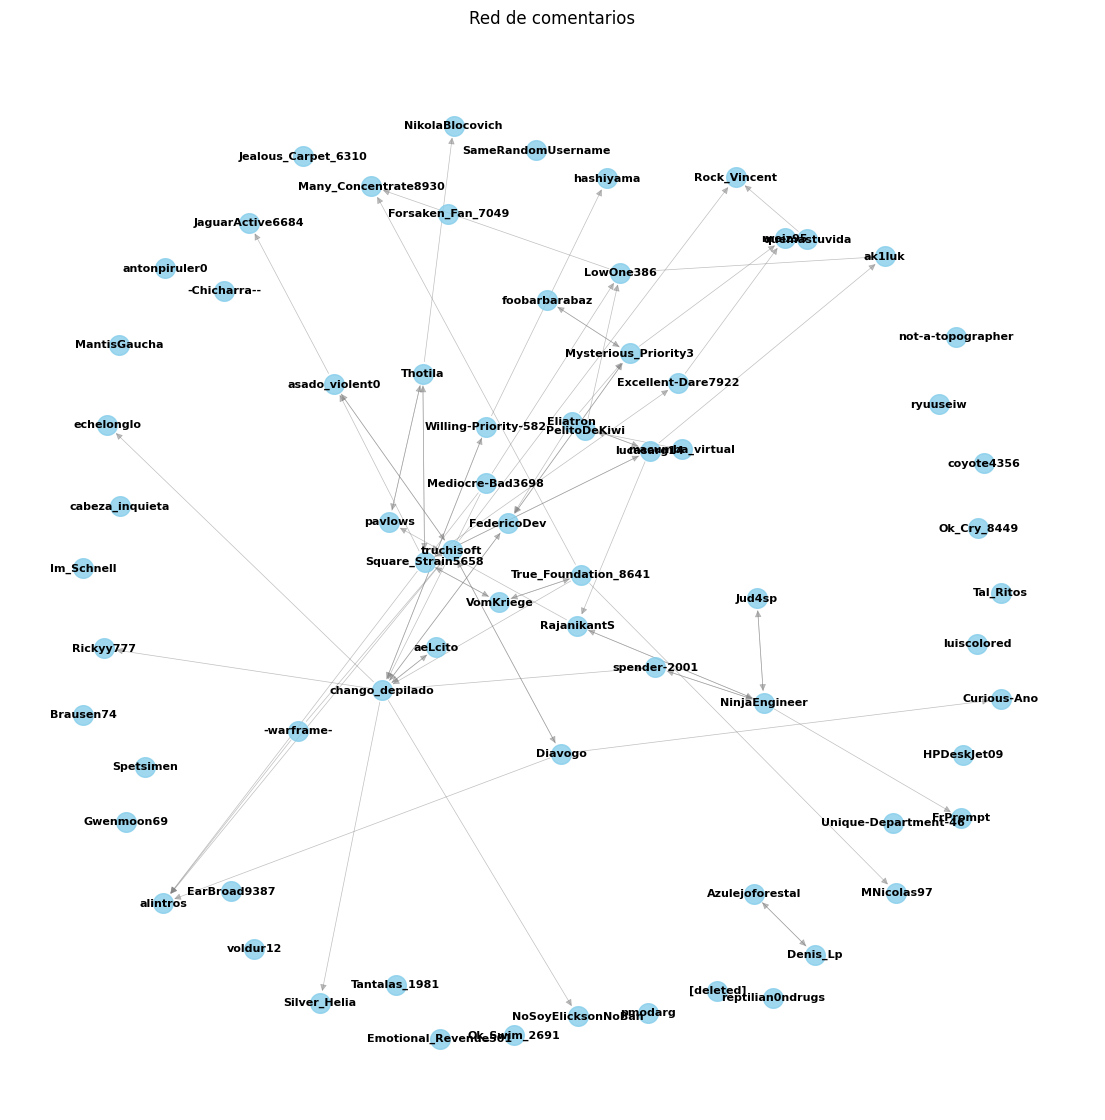

In [ ]:
G = nx.DiGraph()

def add_comments(comment):
    if isinstance(comment, praw.models.Comment):
        try:
            author_name = comment.author.name if comment.author else '[deleted]'
            G.add_node(author_name, body=comment.body)
            if comment.parent_id:
                parent_comment = reddit.comment(comment.parent_id.split('_')[1])
                parent_author_name = parent_comment.author.name if parent_comment.author else '[deleted]'
                G.add_edge(parent_author_name, author_name)
        except Exception as e:
            print(f"Error processing comment: {comment.id}. Error: {e}")
    elif isinstance(comment, praw.models.MoreComments):
        # Aquí podrías agregar lógica adicional si deseas manejar los objetos MoreComments de alguna manera específica
        pass

# Agregar nodos para los comentarios y sus respuestas
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    add_comments(comment)

# Visualizar la red con los nombres de usuario
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 14))  # Aumenta el tamaño del gráfico

# Ajusta la disposición espacial para los nodos
pos = nx.spring_layout(G, k=0.3)  # Reduce la fuerza de repulsión para separar los nodos más

# Dibuja los nodos con estilos visuales mejorados
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

plt.title('Red de comentarios')
plt.axis('off')  # Desactiva los ejes
plt.show()

Post 1

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jcznyso. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0gm65. Error: No data returned for comment t1_11wtgin
Error processing comment: jczpgwg. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0nojv. Error: No data returned for comment t1_11wtgin
Error processing comment: jczt9h1. Error: No data returned for comment t1_11wtgin
Error processing comment: jczx8y4. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd00xk6. Error: No data returned for comment t1_11wtgin
Error processing comment: jd06073. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0jdv7. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd06h9w. Error: No data returned for comment t1_11wtgin
Error processing comment: jczpt7m. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0cany. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jczowsw. Error: No data returned for comment t1_11wtgin
Error processing comment: jczp3f6. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0hitz. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0us6j. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0adwm. Error: No data returned for comment t1_11wtgin
Error processing comment: jczqlci. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0gktl. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0lj9m. Error: No data returned for comment t1_11wtgin
Error processing comment: jczusvg. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd05usi. Error: No data returned for comment t1_11wtgin
Error processing comment: jd06nvj. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1ozke. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0xtd5. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0l2r8. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0g45v. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0mvrk. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2l399. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0t2g2. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0iaj4. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0qqc9. Error: No data returned for comment t1_11wtgin
Error processing comment: jd177f5. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1bzrw. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1pto9. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2ljsz. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd094ab. Error: No data returned for comment t1_11wtgin
Error processing comment: jczvmcr. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0k6nq. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0ofi4. Error: No data returned for comment t1_11wtgin
Error processing comment: jczsqzd. Error: No data returned for comment t1_11wtgin
Error processing comment: jd06rnx. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0duk0. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0e0mz. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1drbb. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1gpa1. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1kfe8. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1ybfj. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2j9h0. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2p3cq. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2uwk5. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2wqgy. Error: No data returned for comment t1_11wtgin
Error processing comment: jd33uth. Error: No data returned for comment t1_11wtgin
Error processing comment: jd342l6. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0zvhg. Error: No data returned for comment t1_11wtgin
Error processing comment: jczto1t. Error: No data returned for comment t1_11wtgin
Error processing comment: jd04ihm. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0mdyx. Error: No data returned for comment t1_11wtgin
Error processing comment: jd19bts. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0591x. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0mq2l. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0wcl0. Error: No data returned for comment t1_11wtgin
Error processing comment: jd18cjq. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0efxv. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0r1vy. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0r5yz. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd14y74. Error: No data returned for comment t1_11wtgin
Error processing comment: jd16idg. Error: No data returned for comment t1_11wtgin
Error processing comment: jd18gq9. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1rtnj. Error: No data returned for comment t1_11wtgin
Error processing comment: jd28fz9. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2c68w. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2kn49. Error: No data returned for comment t1_11wtgin
Error processing comment: jd2unml. Error: No data returned for comment t1_11wtgin
Error processing comment: jd30rhv. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd31f4z. Error: No data returned for comment t1_11wtgin
Error processing comment: jd31sra. Error: No data returned for comment t1_11wtgin
Error processing comment: jczsj3r. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jczwqak. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0eg8o. Error: No data returned for comment t1_11wtgin
Error processing comment: jd132z2. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1cef8. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0g5b7. Error: No data returned for comment t1_11wtgin
Error processing comment: jd00lxs. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1j0tb. Error: No data returned for comment t1_11wtgin
Error processing comment: jd1qtsu. Error: No data returned for comment t1_11wtgin
Error processing comment: jd3kxw6. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3l5js. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0iqjr. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0jos8. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0mm09. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2pemz. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd188qe. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd115gr. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0kdg0. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0lo50. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd15zaj. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1o8jg. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2ei31. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jczzqer. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0gw6s. Error: No data returned for comment t1_11wtgin
Error processing comment: jd0rj3i. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd0v56g. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd11x0f. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd12z2d. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1didb. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1j7fy. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1kimw. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1uzg0. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1wct0. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd1yxgg. Error: No data returned for comment t1_11wtgin
Error processing comment: jd21sg4. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2c3q5. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2m6kj. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2sfnm. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2st78. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2ttvm. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2uqut. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2v749. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2z1la. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd2zodi. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd34nyn. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd38b7p. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd39yay. Error: No data returned for comment t1_11wtgin
Error processing comment: jd3f8o3. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3i60d. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3iqq5. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3k893. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3m561. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3mdud. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3mels. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3pnb3. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3rffs. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3u28w. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd3yu0a. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd44h8y. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd49fos. Error: No data returned for comment t1_11wtgin
Error processing comment: jd4mg64. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd55dv8. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd5mjit. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd64u4c. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd67j87. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd7h9fx. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd8ao7p. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: jd8rlwu. Error: No data returned for comment t1_11wtgin


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Error processing comment: jd1crbb. Error: received 429 HTTP response


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

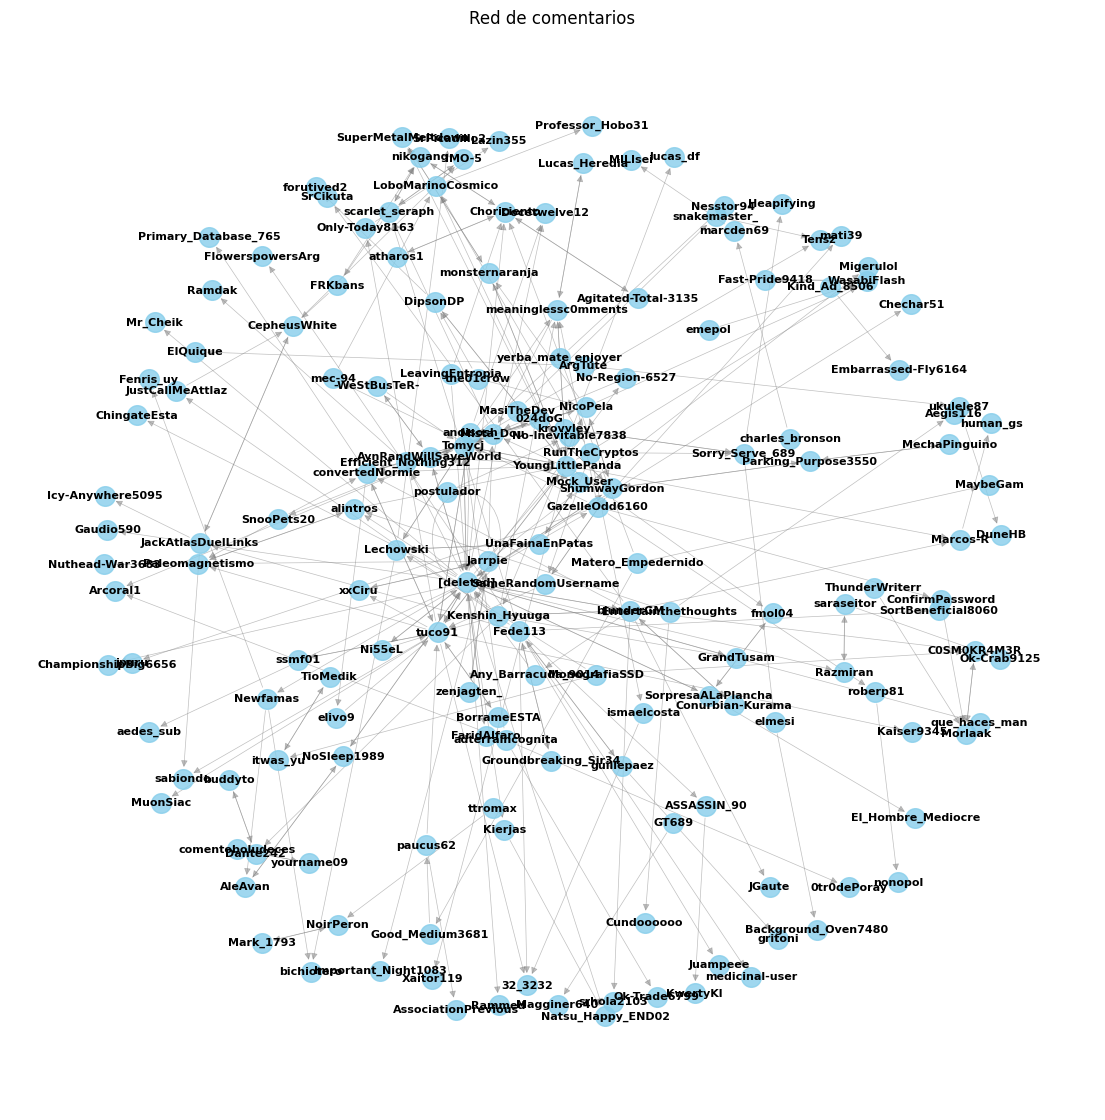

In [ ]:
G1 = nx.DiGraph()

def add_comments(comment):
    if isinstance(comment, praw.models.Comment):
        try:
            author_name = comment.author.name if comment.author else '[deleted]'
            G.add_node(author_name, body=comment.body)
            if comment.parent_id:
                parent_comment = reddit.comment(comment.parent_id.split('_')[1])
                parent_author_name = parent_comment.author.name if parent_comment.author else '[deleted]'
                G1.add_edge(parent_author_name, author_name)
        except Exception as e:
            print(f"Error processing comment: {comment.id}. Error: {e}")
    elif isinstance(comment, praw.models.MoreComments):
        # Aquí podrías agregar lógica adicional si deseas manejar los objetos MoreComments de alguna manera específica
        pass

# Agregar nodos para los comentarios y sus respuestas
submission1.comments.replace_more(limit=None)
for comment in submission1.comments.list():
    add_comments(comment)

# Visualizar la red con los nombres de usuario
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))  # Aumenta el tamaño del gráfico

# Ajusta la disposición espacial para los nodos
pos = nx.spring_layout(G1, k=0.3)  # Reduce la fuerza de repulsión para separar los nodos más

# Dibuja los nodos con estilos visuales mejorados
nx.draw_networkx_nodes(G1, pos, node_size=200, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G1, pos, width=0.5, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G1, pos, font_size=8, font_color='black', font_weight='bold')

plt.title('Red de comentarios')
plt.axis('off')  # Desactiva los ejes
plt.show()




Post 2

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcoe8d. Error: No data returned for comment t1_sux4ht
Error processing comment: hxd3kk9. Error: No data returned for comment t1_sux4ht
Error processing comment: hxco0fk. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcnkcv. Error: No data returned for comment t1_sux4ht
Error processing comment: hxcr7t5. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcm6zn. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcl3o9. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd1pqp. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxckvsd. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcla02. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd07b9. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd8kd1. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd9dt7. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxeamvj. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcqh03. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcm1z1. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcm1nx. Error: No data returned for comment t1_sux4ht
Error processing comment: hxdgsfz. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcufjo. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcqlg8. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd50z5. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcj5dc. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd74pn. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd5mvy. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcm2ot. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxd3vhe. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxe43pc. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxegk7z. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcutvl. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcw0tn. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcvsea. Error: No data returned for comment t1_sux4ht
Error processing comment: hxdcjb7. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcofpa. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcy42c. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxcpt3u. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxdge67. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxdi6c1. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxdt7v2. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxek5i5. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxet5fa. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Error processing comment: hxfqpir. Error: No data returned for comment t1_sux4ht


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

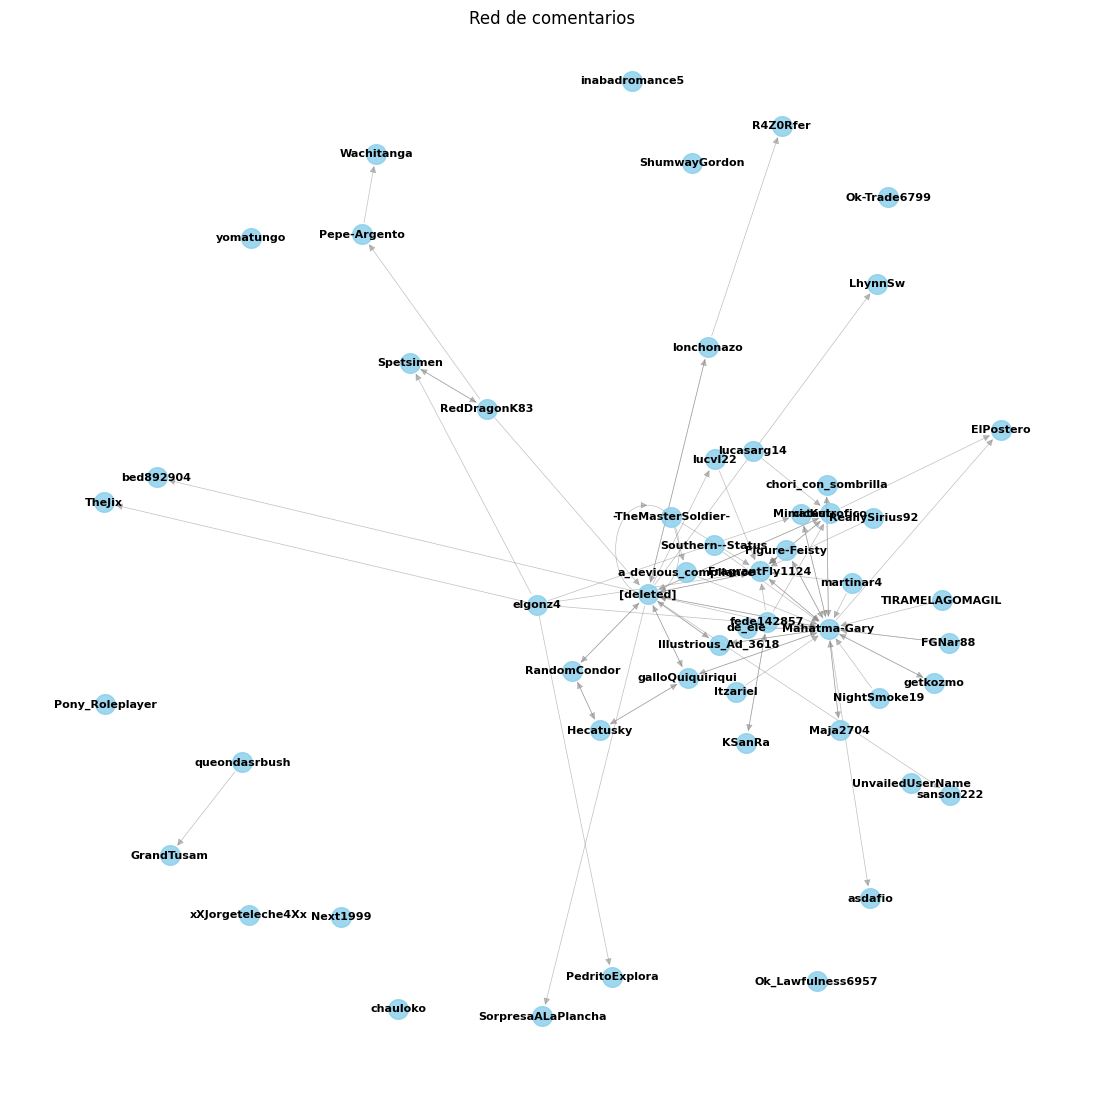

In [ ]:
G2 = nx.DiGraph()

def add_comments(comment):
    if isinstance(comment, praw.models.Comment):
        try:
            author_name = comment.author.name if comment.author else '[deleted]'
            G2.add_node(author_name, body=comment.body)
            if comment.parent_id:
                parent_comment = reddit.comment(comment.parent_id.split('_')[1])
                parent_author_name = parent_comment.author.name if parent_comment.author else '[deleted]'
                G2.add_edge(parent_author_name, author_name)
        except Exception as e:
            print(f"Error processing comment: {comment.id}. Error: {e}")
    elif isinstance(comment, praw.models.MoreComments):
        # Aquí podrías agregar lógica adicional si deseas manejar los objetos MoreComments de alguna manera específica
        pass

# Agregar nodos para los comentarios y sus respuestas
submission2.comments.replace_more(limit=None)
for comment in submission2.comments.list():
    add_comments(comment)

# Visualizar la red con los nombres de usuario
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 14))  # Aumenta el tamaño del gráfico

# Ajusta la disposición espacial para los nodos
pos = nx.spring_layout(G2, k=0.3)  # Reduce la fuerza de repulsión para separar los nodos más

# Dibuja los nodos con estilos visuales mejorados
nx.draw_networkx_nodes(G2, pos, node_size=200, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G2, pos, width=0.5, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G2, pos, font_size=8, font_color='black', font_weight='bold')

plt.title('Red de comentarios')
plt.axis('off')  # Desactiva los ejes
plt.show()





In [ ]:
import praw
import networkx as nx

# ID del post en cuestión
post_id = '1740fvl'  # El ID del post que mencionaste

# Obtiene el post específico utilizando su ID
post = reddit.submission(id=post_id)

# Obtiene los comentarios del post
comentarios = post.comments.list()  # Obtiene una lista de todos los comentarios

# Crea un grafo vacío
G = nx.Graph()

# Agrega nodos y aristas al grafo según los comentarios
for comment in comentarios:
    autor = comment.author
    padre = comment.parent().author if comment.parent() else None

    if autor and padre:
        G.add_edge(autor, padre)  # Agrega una arista entre el autor y el padre

# Calcular métricas de centralidad
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Suponiendo que ya tienes los nodos más influyentes por cada métrica
most_influential_nodes = [
    sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5],
    sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5],
    sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5],
    sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
]

usernames = {}
for influential_nodes in most_influential_nodes:
    for node in influential_nodes:
        if node not in usernames:
            try:
                user = reddit.redditor(str(node))  # Obtener el nombre de usuario a partir del ID del nodo
                usernames[node] = user.name  # Guardar el nombre de usuario asociado al ID del nodo
            except Exception as e:
                print(f"Error al obtener el nombre de usuario para el nodo {node}: {str(e)}")

# Imprimir los nombres de usuario de los nodos más influyentes
for metric, influential_nodes in zip(['Grado', 'Intermediación', 'Cercanía', 'Vector propio'], most_influential_nodes):
    print(f"Nodos más influyentes por {metric}:\n")
    for node in influential_nodes:
        if node in usernames:
            print(f"ID del nodo: {node} | Nombre de usuario: {usernames[node]}")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Nodos más influyentes por Grado:

ID del nodo: Mysterious_Priority3 | Nombre de usuario: Mysterious_Priority3
ID del nodo: chango_depilado | Nombre de usuario: chango_depilado
ID del nodo: Square_Strain5658 | Nombre de usuario: Square_Strain5658
ID del nodo: lucasarg14 | Nombre de usuario: lucasarg14
ID del nodo: truchisoft | Nombre de usuario: truchisoft
Nodos más influyentes por Intermediación:

ID del nodo: Mysterious_Priority3 | Nombre de usuario: Mysterious_Priority3
ID del nodo: chango_depilado | Nombre de usuario: chango_depilado
ID del nodo: truchisoft | Nombre de usuario: truchisoft
ID del nodo: True_Foundation_8641 | Nombre de usuario: True_Foundation_8641
ID del nodo: Square_Strain5658 | Nombre de usuario: Square_Strain5658
Nodos más influyentes por Cercanía:

ID del nodo: Mysterious_Priority3 | Nombre de usuario: Mysterious_Priority3
ID del nodo: chango_depilado | Nombre de usuario: chango_depilado
ID del nodo: Square_Strain5658 | Nombre de usuario: Square_Strain5658
ID del

Post 1

In [ ]:
import praw
import networkx as nx

# ID del post en cuestión
post_id = 'sux4ht'  # El ID del post que mencionaste

# Obtiene el post específico utilizando su ID
post = reddit.submission(id=post_id)

# Obtiene los comentarios del post
comentarios = post.comments.list()  # Obtiene una lista de todos los comentarios

# Crea un grafo vacío
G = nx.Graph()

for comment in comentarios:
    if isinstance(comment, praw.models.Comment):  # Filtra solo los comentarios
        autor = comment.author
        padre = comment.parent().author if comment.parent() else None

        if autor and padre:
            G.add_edge(autor.name, padre.name)  # Agrega una arista entre el autor y el padre

# Calcular métricas de centralidad
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Suponiendo que ya tienes los nodos más influyentes por cada métrica
most_influential_nodes = [
    sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5],
    sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5],
    sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5],
    sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
]

usernames = {}
for influential_nodes in most_influential_nodes:
    for node in influential_nodes:
        if node not in usernames:
            try:
                user = reddit.redditor(str(node))  # Obtener el nombre de usuario a partir del ID del nodo
                usernames[node] = user.name  # Guardar el nombre de usuario asociado al ID del nodo
            except Exception as e:
                print(f"Error al obtener el nombre de usuario para el nodo {node}: {str(e)}")

# Imprimir los nombres de usuario de los nodos más influyentes
for metric, influential_nodes in zip(['Grado', 'Intermediación', 'Cercanía', 'Vector propio'], most_influential_nodes):
    print(f"Nodos más influyentes por {metric}:\n")
    for node in influential_nodes:
        if node in usernames:
            print(f"ID del nodo: {node} | Nombre de usuario: {usernames[node]}")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Nodos más influyentes por Grado:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: elgonz4 | Nombre de usuario: elgonz4
ID del nodo: catastrofico | Nombre de usuario: catastrofico
ID del nodo: fede142857 | Nombre de usuario: fede142857
Nodos más influyentes por Intermediación:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: elgonz4 | Nombre de usuario: elgonz4
ID del nodo: RedDragonK83 | Nombre de usuario: RedDragonK83
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: queondasrbush | Nombre de usuario: queondasrbush
Nodos más influyentes por Cercanía:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: elgonz4 | Nombre de usuario: elgonz4
ID del nodo: RedDragonK83 | Nombre de usuario: RedDragonK83
ID del nodo: catastrofico | Nombre de usuario: catastrofico


Post 2

In [ ]:
import praw
import networkx as nx

# ID del post en cuestión
post_id = '11wtgin'  # El ID del post que mencionaste

# Obtiene el post específico utilizando su ID
post = reddit.submission(id=post_id)

# Obtiene los comentarios del post
comentarios = post.comments.list()  # Obtiene una lista de todos los comentarios

# Crea un grafo vacío
G = nx.Graph()

# Agrega nodos y aristas al grafo según los comentarios
for comment in comentarios:
    if isinstance(comment, praw.models.Comment):  # Filtra solo los comentarios
        autor = comment.author
        padre = comment.parent().author if comment.parent() else None

        if autor and padre:
            G.add_edge(autor.name, padre.name)  # Agrega una arista entre el autor y el padre

    if autor and padre:
        G.add_edge(autor, padre)  # Agrega una arista entre el autor y el padre

# Calcular métricas de centralidad
degree_centrality = nx.degree_centrality(G2)
betweenness_centrality = nx.betweenness_centrality(G2)
closeness_centrality = nx.closeness_centrality(G2)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Suponiendo que ya tienes los nodos más influyentes por cada métrica
most_influential_nodes = [
    sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5],
    sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5],
    sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5],
    sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
]

usernames = {}
for influential_nodes in most_influential_nodes:
    for node in influential_nodes:
        if node not in usernames:
            try:
                user = reddit.redditor(str(node))  # Obtener el nombre de usuario a partir del ID del nodo
                usernames[node] = user.name  # Guardar el nombre de usuario asociado al ID del nodo
            except Exception as e:
                print(f"Error al obtener el nombre de usuario para el nodo {node}: {str(e)}")

# Imprimir los nombres de usuario de los nodos más influyentes
for metric, influential_nodes in zip(['Grado', 'Intermediación', 'Cercanía', 'Vector propio'], most_influential_nodes):
    print(f"Nodos más influyentes por {metric}:\n")
    for node in influential_nodes:
        if node in usernames:
            print(f"ID del nodo: {node} | Nombre de usuario: {usernames[node]}")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Nodos más influyentes por Grado:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: [deleted] | Nombre de usuario: [deleted]
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: fede142857 | Nombre de usuario: fede142857
ID del nodo: catastrofico | Nombre de usuario: catastrofico
Nodos más influyentes por Intermediación:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: [deleted] | Nombre de usuario: [deleted]
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: fede142857 | Nombre de usuario: fede142857
ID del nodo: galloQuiquiriqui | Nombre de usuario: galloQuiquiriqui
Nodos más influyentes por Cercanía:

ID del nodo: Mahatma-Gary | Nombre de usuario: Mahatma-Gary
ID del nodo: [deleted] | Nombre de usuario: [deleted]
ID del nodo: FragrantFly1124 | Nombre de usuario: FragrantFly1124
ID del nodo: galloQuiquiriqui | Nombre de usuario: galloQuiquiriqui
ID del nodo: Illustrious_Ad_3618 | Nom

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Nube de palabras


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


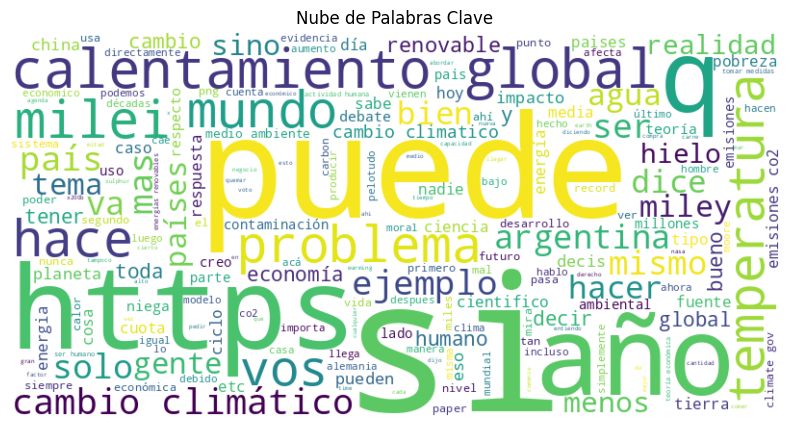

In [ ]:
# Obtener las palabras clave más utilizadas en los comentarios
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import praw

nltk.download('stopwords')  # Descargar stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))  # Lista de palabras irrelevantes en español

comments = ""
for comment in submission.comments.list():
    if isinstance(comment, praw.models.Comment):
        comments += comment.body + "\n"  # Add newline to separate comments

words = comments.lower().split()
filtered_words_spanish = [word for word in words if word.lower() not in stop_words_spanish]  # Filtrar palabras irrelevantes en español

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words_spanish))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave')
plt.show()


In [ ]:
submission1

Submission(id='11wtgin')

Post 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


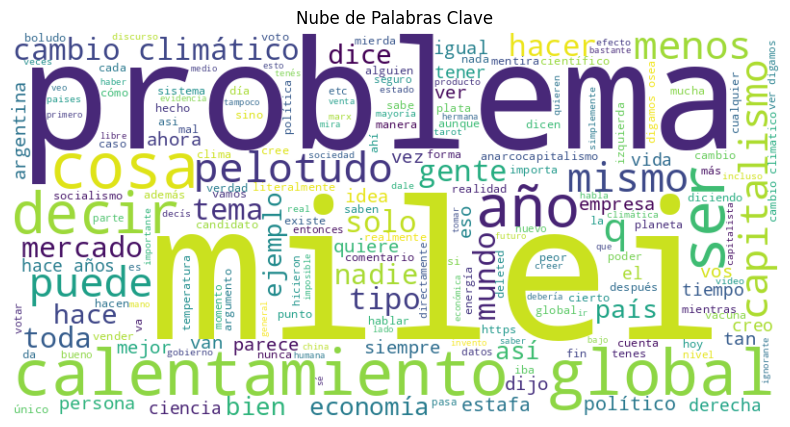

In [ ]:
# Obtener las palabras clave más utilizadas en los comentarios
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import praw

nltk.download('stopwords')  # Descargar stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))  # Lista de palabras irrelevantes en español

# Agregar "cosa" a las palabras irrelevantes
stop_words_spanish.add('cosa')
stop_words_spanish.add('mas')
stop_words_spanish.add('si')
stop_words_spanish.add('va')


comments = ""
for comment in submission1.comments.list():
    if isinstance(comment, praw.models.Comment):
        comments += comment.body + "\n"  # Add newline to separate comments

words = comments.lower().split()
filtered_words_spanish = [word for word in words if word.lower() not in stop_words_spanish]  # Filtrar palabras irrelevantes en español

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words_spanish))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave')
plt.show()


Post 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


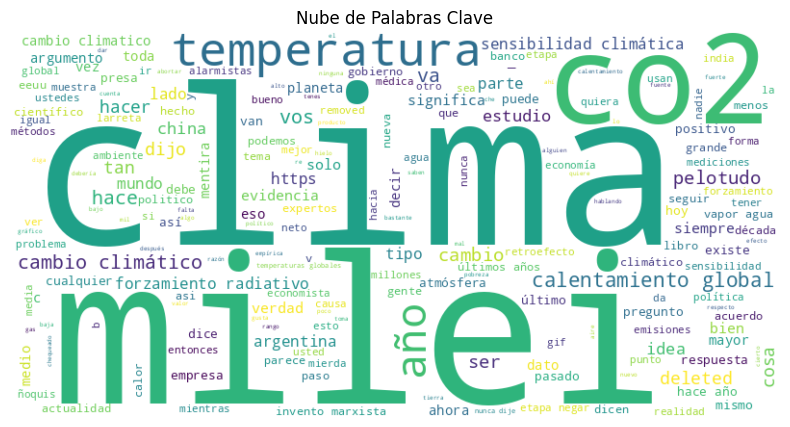

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import praw
import nltk

nltk.download('stopwords')  # Descargar stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))  # Lista de palabras irrelevantes en español

# Agregar palabras a las stopwords DESPUÉS de inicializar stop_words_spanish
stop_words_spanish.add('cosa')
stop_words_spanish.add('mas')
stop_words_spanish.add('si')
stop_words_spanish.add('mas.')
stop_words_spanish.add('https')
stop_words_spanish.add('s i')

comments = ""
for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        comments += comment.body + "\n"  # Add newline to separate comments

words = comments.lower().split()
filtered_words_spanish = [word for word in words if word.lower() not in stop_words_spanish]  # Filtrar palabras irrelevantes en español

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words_spanish))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave')
plt.show()


En particular, la nube de palabras sugiere que la participación de Javier Milei en el debate sobre el cambio climático ha contribuido a aumentar la polarización del tema. Esto se refleja en la aparición de las palabras clave "miente" y "problema". La palabra "miente" sugiere que hay un desacuerdo sobre la posición de Milei sobre el cambio climático, mientras que la palabra "problema" sugiere que el cambio climático se percibe como un problema.

Esta polarización es un desafío para el progreso en la acción climática en Argentina. Es importante que los diferentes actores en el debate sobre el cambio climático puedan encontrar puntos de encuentro para avanzar en soluciones.

En relación a que la nube de palabras es en realidad una nube de sentimientos, se pueden plantear las siguientes preguntas y respuestas:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


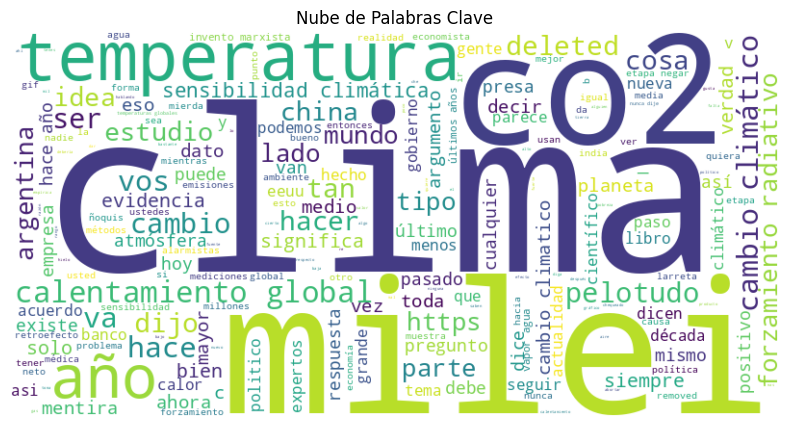

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import praw

nltk.download('stopwords')  # Descargar stopwords en español
stop_words_spanish = set(stopwords.words('spanish'))  # Lista de palabras irrelevantes en español

# Agregar palabras a las stopwords DESPUÉS de inicializar stop_words_spanish
stop_words_spanish.add('cosa')
stop_words_spanish.add('mas')
stop_words_spanish.add('si')

comments = ""
for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        comments += comment.body + "\n"  # Add newline to separate comments

words = comments.lower().split()
filtered_words_spanish = [word for word in words if word.lower() not in stop_words_spanish]  # Filtrar palabras irrelevantes en español

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words_spanish))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Clave')
plt.show()


# Construir una red de co-ocurrencia de palabras con las 50 conexiones más frecuentes


In [ ]:
from textblob import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


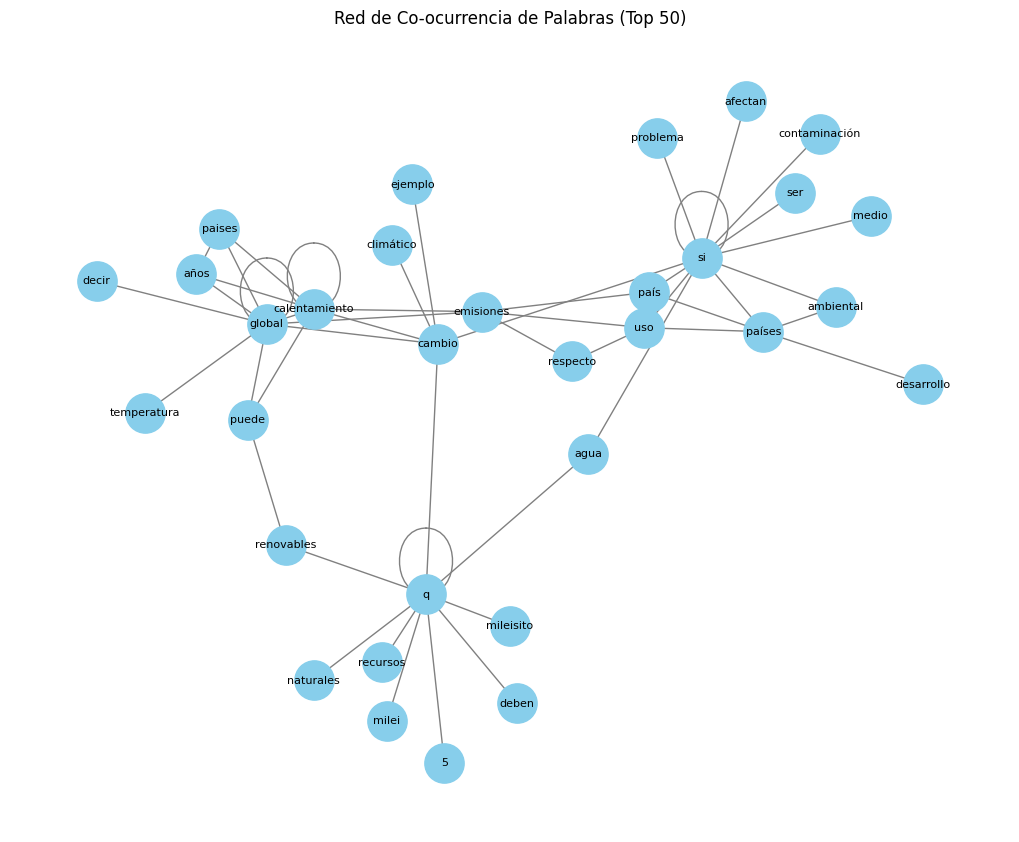

In [ ]:
from itertools import combinations
from collections import defaultdict
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import praw
import nltk

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('spanish'))
# Agregar otras palabras irrelevantes que desees quitar
stop_words.add('https')

comments_data = submission.comments.list()
word_pairs = defaultdict(int)

for comment in comments_data:
    comment_body = comment.body
    comment_words = TextBlob(comment_body).words
    comment_words = [word.lower() for word in comment_words if word.lower() not in stop_words]
    for w1, w2 in combinations(comment_words, 2):
        word_pairs[(w1, w2)] += 1

top_50_pairs = sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)[:50]

co_occurrence_graph = nx.Graph()
for (w1, w2), weight in top_50_pairs:
    co_occurrence_graph.add_edge(w1, w2, weight=weight)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(co_occurrence_graph, k=0.5)
nx.draw(co_occurrence_graph, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=800, edge_color='gray')
plt.title('Red de Co-ocurrencia de Palabras (Top 50)')
plt.show()


Pregunta: ¿Cómo se relacionan las palabras recurrentes con las diferentes comunidades que participan en la conversación sobre el cambio climático?

Respuesta: Las palabras recurrentes pueden variar según la comunidad que participa en la conversación. Por ejemplo, las comunidades ambientalistas pueden usar palabras como "desastre" o "catástrofe", mientras que las comunidades económicas pueden usar palabras como "costo" o "impacto".

Post 1

In [ ]:
submission2

Submission(id='sux4ht')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


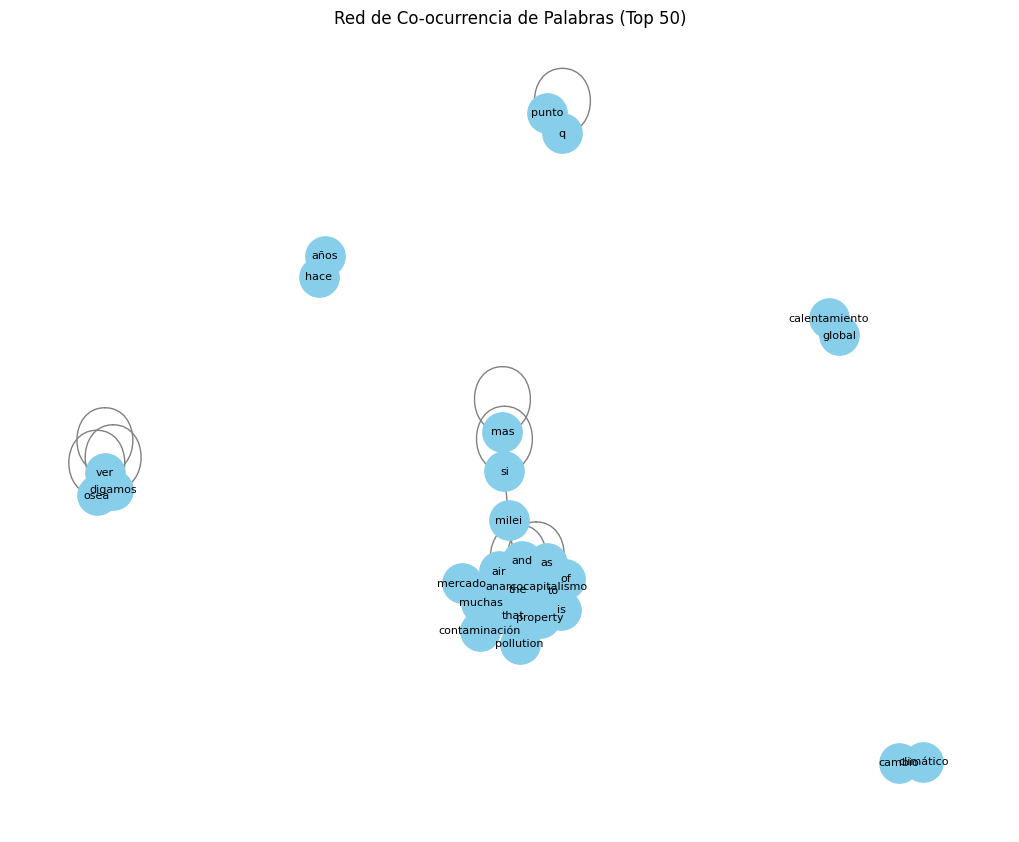

In [ ]:
from collections import defaultdict
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import praw
import nltk

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('spanish'))
# Agregar otras palabras irrelevantes que desees quitar
stop_words.add('https')

def process_comments(comments, word_pairs):
    for comment in comments:
        if isinstance(comment, praw.models.MoreComments):
            # Si es un objeto 'MoreComments', llamamos recursivamente a 'process_comments' para obtener más comentarios
            process_comments(comment.comments(), word_pairs)
        else:
            comment_body = comment.body
            comment_words = TextBlob(comment_body).words
            comment_words = [word.lower() for word in comment_words if word.lower() not in stop_words]
            for w1, w2 in combinations(comment_words, 2):
                word_pairs[(w1, w2)] += 1

word_pairs = defaultdict(int)
process_comments(submission1.comments.list(), word_pairs)

top_50_pairs = sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)[:50]

co_occurrence_graph = nx.Graph()
for (w1, w2), weight in top_50_pairs:
    co_occurrence_graph.add_edge(w1, w2, weight=weight)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(co_occurrence_graph, k=0.5)
nx.draw(co_occurrence_graph, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=800, edge_color='gray')
plt.title('Red de Co-ocurrencia de Palabras (Top 50)')
plt.show()


Post 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info

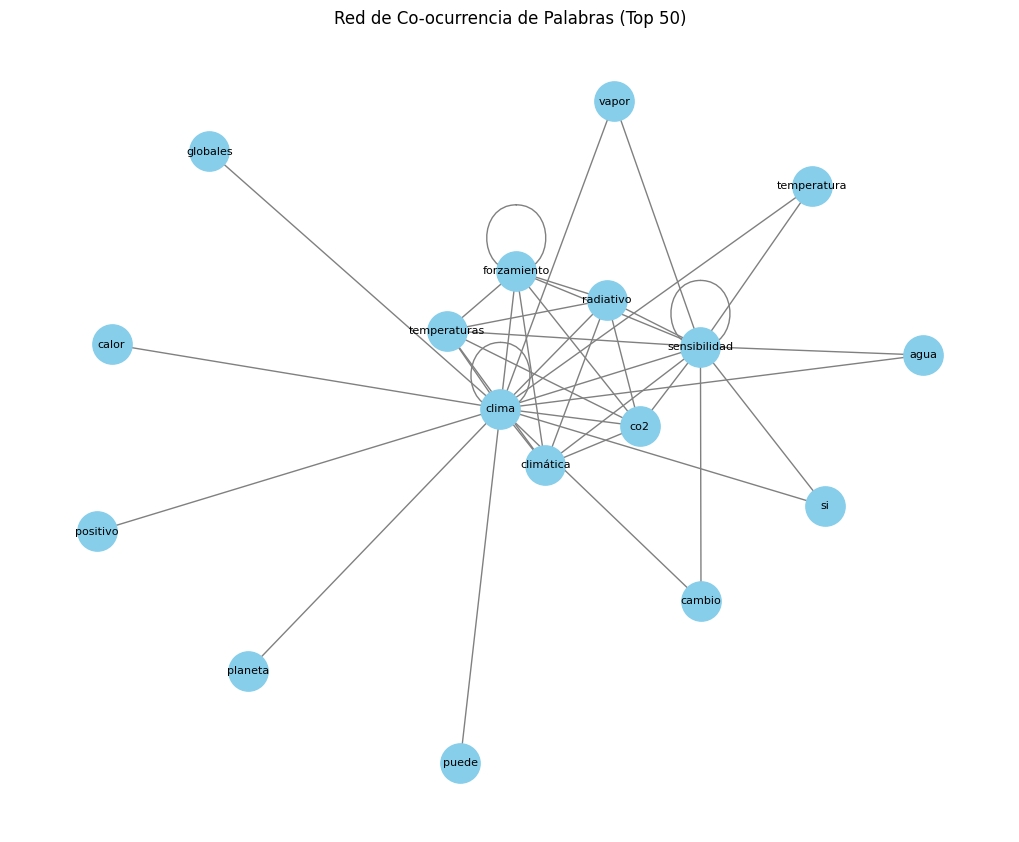

In [ ]:
from itertools import combinations
from collections import defaultdict
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import praw
import nltk

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('spanish'))
# Agregar otras palabras irrelevantes que desees quitar

def process_comments(comments, word_pairs):
    for comment in comments:
        if isinstance(comment, praw.models.MoreComments):
            # Si es un objeto 'MoreComments', llamamos recursivamente a 'process_comments' para obtener más comentarios
            process_comments(comment.comments(), word_pairs)
        else:
            comment_body = comment.body
            comment_words = TextBlob(comment_body).words
            comment_words = [word.lower() for word in comment_words if word.lower() not in stop_words]
            for w1, w2 in combinations(comment_words, 2):
                word_pairs[(w1, w2)] += 1

submission2 = reddit.submission(url='https://www.reddit.com/r/argentina/comments/sux4ht/milei_sobre_el_cambio_clim%C3%A1tico_si_uno_mirara_lo/')

word_pairs = defaultdict(int)
process_comments(submission2.comments.list(), word_pairs)

top_50_pairs = sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)[:50]

co_occurrence_graph = nx.Graph()
for (w1, w2), weight in top_50_pairs:
    co_occurrence_graph.add_edge(w1, w2, weight=weight)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(co_occurrence_graph, k=0.5)
nx.draw(co_occurrence_graph, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=800, edge_color='gray')
plt.title('Red de Co-ocurrencia de Palabras (Top 50)')
plt.show()


# Detección de comunidades

In [ ]:
# Detección de comunidades usando algoritmo de Louvain
from community import community_louvain

# Distribución Temporal de Comentarios

In [ ]:
# Obtener la información temporal de los comentarios
comment_timestamps = [comment.created_utc for comment in submission.comments.list()]

# Convertir los timestamps a formato de fecha y hora
comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

# Crear un DataFrame con las fechas y horas
data = {'CommentTimestamp': comment_timestamps, 'CommentDate': comment_dates}
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())


   CommentTimestamp         CommentDate
0      1.696880e+09 2023-10-09 19:25:26
1      1.696880e+09 2023-10-09 19:25:59
2      1.696880e+09 2023-10-09 19:34:40
3      1.696886e+09 2023-10-09 21:06:51
4      1.696880e+09 2023-10-09 19:26:06


   CommentTimestamp         CommentDate  Hour  Day  Month
0      1.696880e+09 2023-10-09 19:25:26    19    9     10
1      1.696880e+09 2023-10-09 19:25:59    19    9     10
2      1.696880e+09 2023-10-09 19:34:40    19    9     10
3      1.696886e+09 2023-10-09 21:06:51    21    9     10
4      1.696880e+09 2023-10-09 19:26:06    19    9     10


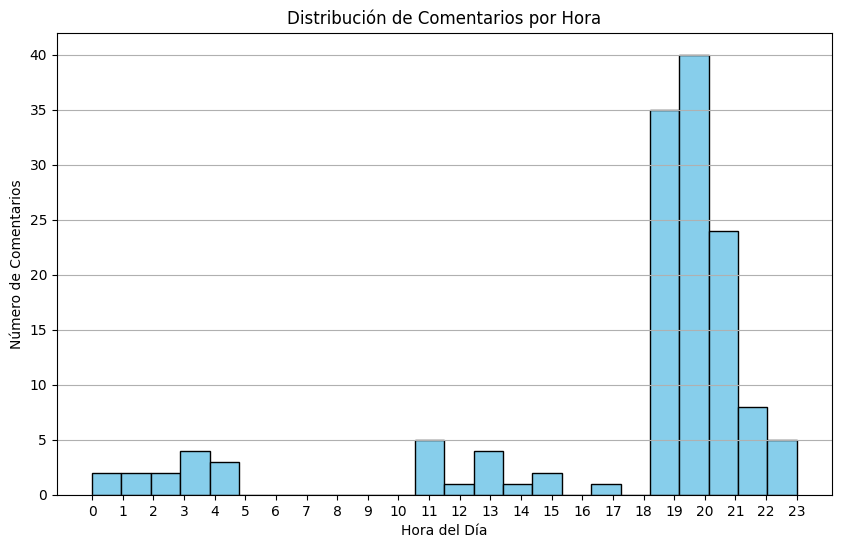

In [ ]:
# Extraer la información de hora, día y mes de los comentarios
df['Hour'] = df['CommentDate'].dt.hour
df['Day'] = df['CommentDate'].dt.day
df['Month'] = df['CommentDate'].dt.month

# Mostrar las primeras filas del DataFrame con la información agregada
print(df.head())


# Graficar la distribución de comentarios por hora
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribución de Comentarios por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Comentarios')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


Pregunta: ¿Cuál es la tendencia general de la conversación sobre el cambio climático en Argentina?

Respuesta: El gráfico muestra un aumento gradual en la conversación sobre el cambio climático en Argentina durante el período de estudio. Esto sugiere que el tema está ganando relevancia en la opinión pública argentina.

Pregunta: ¿Cuál es el impacto de Javier Milei en esta tendencia?

Respuesta: El gráfico muestra un aumento significativo en la conversación sobre el cambio climático en Argentina durante el período en el que Javier Milei comenzó a participar activamente en el debate. Esto sugiere que Milei ha contribuido a aumentar la visibilidad del tema en la conversación pública.

In [ ]:
# Obtener la información temporal de los comentarios
comment_timestamps = [comment.created_utc for comment in submission.comments.list()]

# Convertir los timestamps a formato de fecha y hora
comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

# Crear un DataFrame con las fechas formateadas
data = {'CommentDate': [date.strftime('%Y-%m-%d') for date in comment_dates]}
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())


  CommentDate
0  2023-10-09
1  2023-10-09
2  2023-10-09
3  2023-10-09
4  2023-10-09


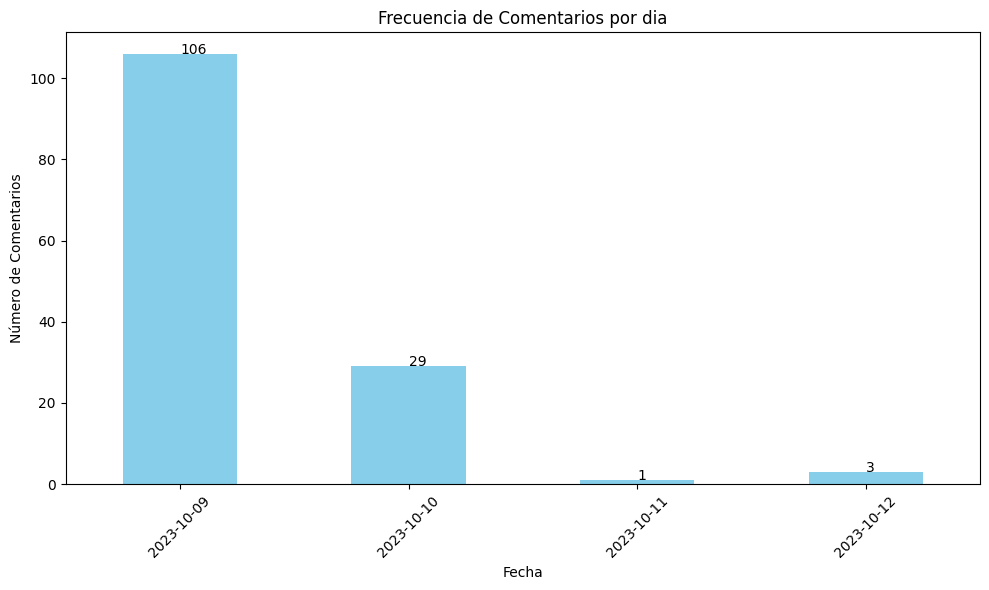

In [ ]:
# Contar la frecuencia de comentarios por fecha
comment_count_per_date = df['CommentDate'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comment_count_per_date.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Comentarios por dia')
plt.xlabel('Fecha')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a las barras
for i in range(len(comment_count_per_date)):
    plt.annotate(str(comment_count_per_date.iloc[i]), (i, comment_count_per_date.iloc[i]))

plt.show()


Post 1


In [ ]:
# Obtener la información temporal de los comentarios
comment_timestamps = [comment.created_utc for comment in submission1.comments.list()]

# Convertir los timestamps a formato de fecha y hora
comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

# Crear un DataFrame con las fechas y horas
data = {'CommentTimestamp': comment_timestamps, 'CommentDate': comment_dates}
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())


   CommentTimestamp         CommentDate
0      1.679342e+09 2023-03-20 19:46:54
1      1.679353e+09 2023-03-20 22:56:52
2      1.679342e+09 2023-03-20 19:56:22
3      1.679356e+09 2023-03-20 23:47:13
4      1.679344e+09 2023-03-20 20:20:33


   CommentTimestamp         CommentDate  Hour  Day  Month
0      1.679342e+09 2023-03-20 19:46:54    19   20      3
1      1.679353e+09 2023-03-20 22:56:52    22   20      3
2      1.679342e+09 2023-03-20 19:56:22    19   20      3
3      1.679356e+09 2023-03-20 23:47:13    23   20      3
4      1.679344e+09 2023-03-20 20:20:33    20   20      3


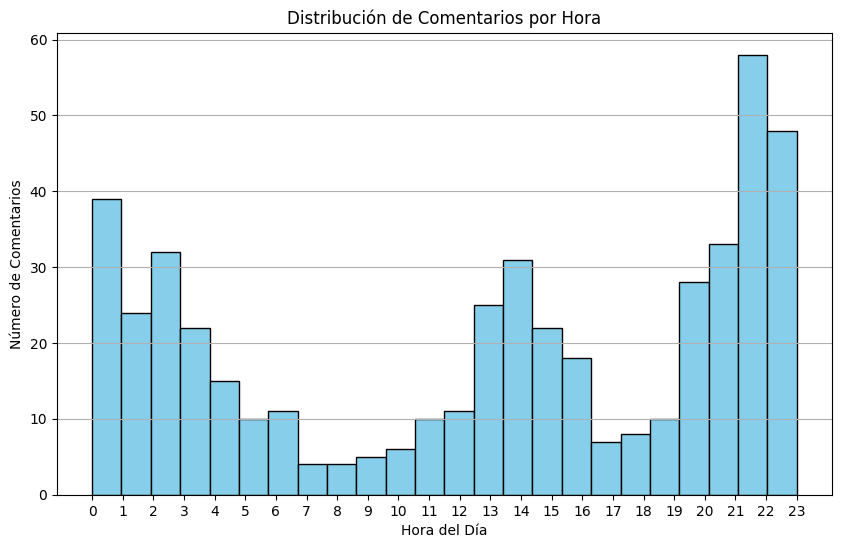

In [ ]:
# Extraer la información de hora, día y mes de los comentarios
df['Hour'] = df['CommentDate'].dt.hour
df['Day'] = df['CommentDate'].dt.day
df['Month'] = df['CommentDate'].dt.month

# Mostrar las primeras filas del DataFrame con la información agregada
print(df.head())


# Graficar la distribución de comentarios por hora
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribución de Comentarios por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Comentarios')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


In [ ]:
# Obtener la información temporal de los comentarios
comment_timestamps = [comment.created_utc for comment in submission1.comments.list()]

# Convertir los timestamps a formato de fecha y hora
comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

# Crear un DataFrame con las fechas formateadas
data = {'CommentDate': [date.strftime('%Y-%m-%d') for date in comment_dates]}
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())


  CommentDate
0  2023-03-20
1  2023-03-20
2  2023-03-20
3  2023-03-20
4  2023-03-20


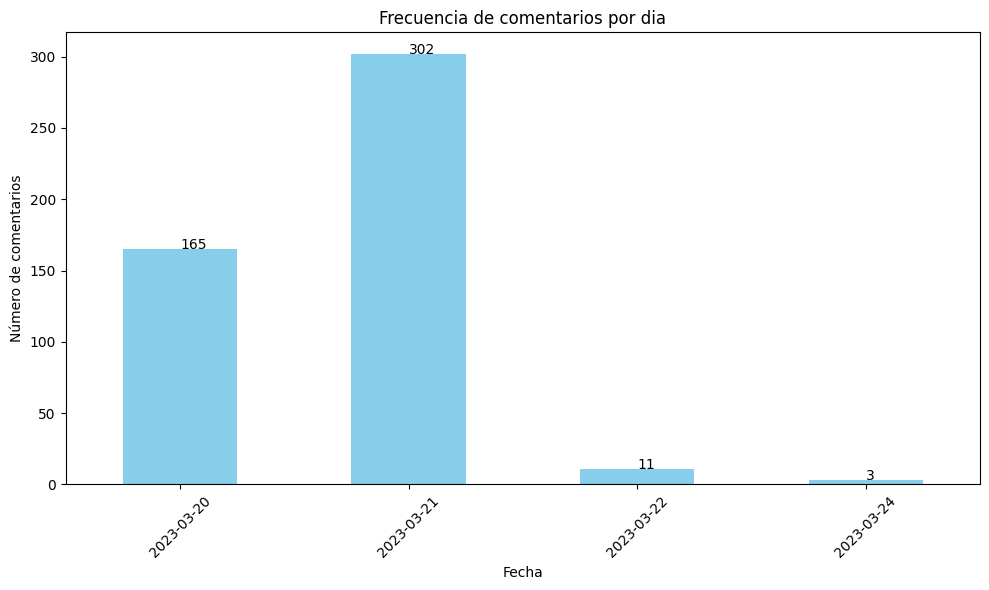

In [ ]:
# Contar la frecuencia de comentarios por fecha
comment_count_per_date = df['CommentDate'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comment_count_per_date.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de comentarios por dia')
plt.xlabel('Fecha')
plt.ylabel('Número de comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a las barras
for i in range(len(comment_count_per_date)):
    plt.annotate(str(comment_count_per_date.iloc[i]), (i, comment_count_per_date.iloc[i]))

plt.show()


Post 2

In [ ]:
submission2


Submission(id='sux4ht')

In [ ]:
import praw
import pandas as pd
import datetime

submission2 = reddit.submission(url='https://www.reddit.com/r/argentina/comments/sux4ht/milei_sobre_el_cambio_clim%C3%A1tico_si_uno_mirara_lo/')

comment_timestamps = []
for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        comment_timestamps.append(comment.created_utc)
    elif isinstance(comment, praw.models.MoreComments):
        # Si es un objeto 'MoreComments', expandirlo para obtener los comentarios reales
        expanded_comments = comment.comments()
        for expanded_comment in expanded_comments:
            comment_timestamps.append(expanded_comment.created_utc)

comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

data = {'CommentTimestamp': comment_timestamps, 'CommentDate': comment_dates}
df = pd.DataFrame(data)

print(df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   CommentTimestamp         CommentDate
0      1.645128e+09 2022-02-17 20:04:28
1      1.645134e+09 2022-02-17 21:40:54
2      1.645128e+09 2022-02-17 20:02:04
3      1.645128e+09 2022-02-17 19:59:15
4      1.645129e+09 2022-02-17 20:22:35


   CommentTimestamp         CommentDate  Hour  Day  Month
0      1.645128e+09 2022-02-17 20:04:28    20   17      2
1      1.645134e+09 2022-02-17 21:40:54    21   17      2
2      1.645128e+09 2022-02-17 20:02:04    20   17      2
3      1.645128e+09 2022-02-17 19:59:15    19   17      2
4      1.645129e+09 2022-02-17 20:22:35    20   17      2


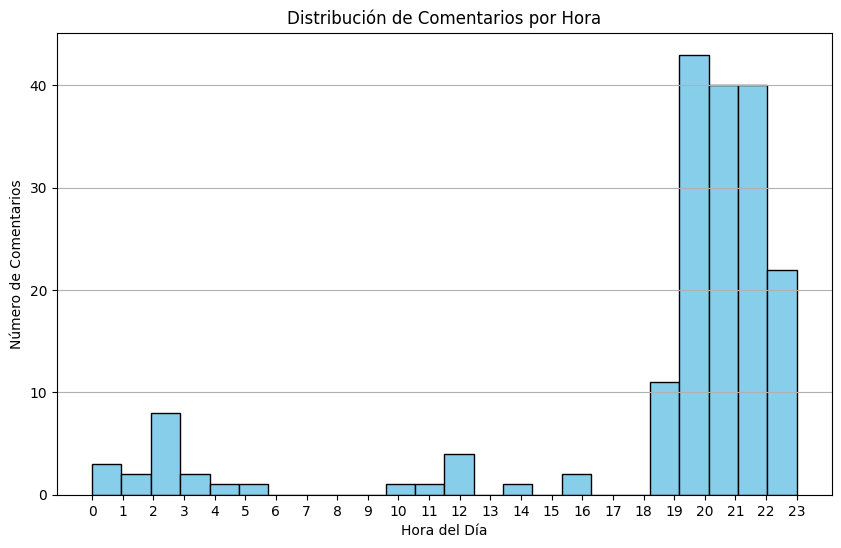

In [ ]:
# Extraer la información de hora, día y mes de los comentarios
df['Hour'] = df['CommentDate'].dt.hour
df['Day'] = df['CommentDate'].dt.day
df['Month'] = df['CommentDate'].dt.month

# Mostrar las primeras filas del DataFrame con la información agregada
print(df.head())


# Graficar la distribución de comentarios por hora
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribución de Comentarios por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Comentarios')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


In [ ]:


submission2 = reddit.submission(url='https://www.reddit.com/r/argentina/comments/sux4ht/milei_sobre_el_cambio_clim%C3%A1tico_si_uno_mirara_lo/')

comment_timestamps = []
for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        comment_timestamps.append(comment.created_utc)
    elif isinstance(comment, praw.models.MoreComments):
        # Si es un objeto 'MoreComments', expandirlo para obtener los comentarios reales
        expanded_comments = comment.comments()
        for expanded_comment in expanded_comments:
            comment_timestamps.append(expanded_comment.created_utc)

comment_dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in comment_timestamps]

data = {'CommentDate': [date.strftime('%Y-%m-%d') for date in comment_dates]}
df = pd.DataFrame(data)

print(df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



  CommentDate
0  2022-02-17
1  2022-02-17
2  2022-02-17
3  2022-02-17
4  2022-02-17


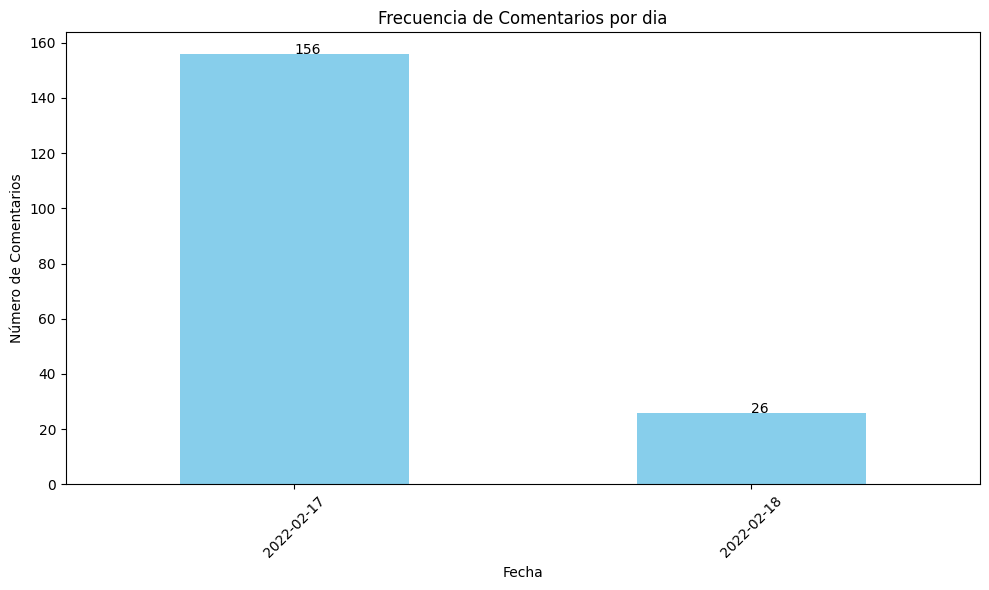

In [ ]:
# Contar la frecuencia de comentarios por fecha
comment_count_per_date = df['CommentDate'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comment_count_per_date.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Comentarios por dia')
plt.xlabel('Fecha')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

# Agregar etiquetas a las barras
for i in range(len(comment_count_per_date)):
    plt.annotate(str(comment_count_per_date.iloc[i]), (i, comment_count_per_date.iloc[i]))

plt.show()


# Analisis de sentimientos, emociones, hate speech

In [ ]:
!pip install textblob
!pip install nltk


In [ ]:
!pip install pysentimiento

### Analisis de sentimientos

In [ ]:
from pysentimiento import create_analyzer
import transformers

transformers.logging.set_verbosity(transformers.logging.ERROR)

analyzer = create_analyzer(task="sentiment", lang="es")

In [ ]:
submission = reddit.submission(id="1740fvl")
submission2 = reddit.submission(id="sux4ht")
submission1 = reddit.submission(id="11wtgin")


Post 1:

In [ ]:
sentiment_results = []

for comment in submission.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        sentiment = analyzer.predict(text)
        sentiment_results.append({'Author': author_name, 'Text': text, 'Sentiment': sentiment})

# Construir el DataFrame
sentiment_df = pd.DataFrame(sentiment_results)
print(sentiment_df.head())  # Muestra las primeras filas del DataFrame


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



              Author                                               Text  \
0    macumba_virtual                  miley? qué no era cantante ahora?   
1           ryuuseiw  pero la nasa me dijo este año que la Argentina...   
2  Square_Strain5658  Lo que dice Milei es cierto a medias... Si bie...   
3       MantisGaucha           Ni idea capo, quiero llegar a fin de mes   
4         -warframe-  Concuerdo que el ciclo del que habla milei exi...   

                                           Sentiment  
0  AnalyzerOutput(output=NEU, probas={NEU: 0.658,...  
1  AnalyzerOutput(output=NEU, probas={NEU: 0.707,...  
2  AnalyzerOutput(output=NEU, probas={NEU: 0.574,...  
3  AnalyzerOutput(output=NEG, probas={NEG: 0.537,...  
4  AnalyzerOutput(output=NEG, probas={NEG: 0.615,...  


In [ ]:
sentiment_df

,Author,Text,Sentiment
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=NEU, probas={NEU: 0.658,..."
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,..."
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=NEU, probas={NEU: 0.574,..."
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=NEG, probas={NEG: 0.537,..."
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=NEG, probas={NEG: 0.615,..."
...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=NEG, probas={NEG: 0.942,..."
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=NEG, probas={NEG: 0.818,..."
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=POS, probas={POS: 0.588,..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=NEG, probas={NEG: 0.830,..."


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
positive_count = (sentiment_df['Sentiment'].apply(lambda x: x.output == 'POS')).sum()
negative_count = (sentiment_df['Sentiment'].apply(lambda x: x.output == 'NEG')).sum()
neutral_count = (sentiment_df['Sentiment'].apply(lambda x: x.output == 'NEU')).sum()

# Mostrar el resumen
print(f"Comentarios positivos: {positive_count}")
print(f"Comentarios negativos: {negative_count}")
print(f"Comentarios neutros: {neutral_count}")


Comentarios positivos: 4
Comentarios negativos: 94
Comentarios neutros: 41


In [ ]:
# Definir las condiciones
conditions = [
    (sentiment_df['Sentiment'] == 'POS'),
    (sentiment_df['Sentiment'] == 'NEG'),
    (sentiment_df['Sentiment'] == 'NEU')
]

# Definir los valores a asignar para cada condición
values = ['POS', 'NEG', 'NEU']

# Crear la nueva columna 'NewSentiment' basada en las condiciones y valores establecidos
sentiment_df['NewSentiment'] = np.select(conditions, values, default='UNKNOWN')

# Mostrar las primeras filas del DataFrame con la nueva columna
print(sentiment_df.head())


              Author                                               Text  \
0    macumba_virtual                  miley? qué no era cantante ahora?   
1           ryuuseiw  pero la nasa me dijo este año que la Argentina...   
2  Square_Strain5658  Lo que dice Milei es cierto a medias... Si bie...   
3       MantisGaucha           Ni idea capo, quiero llegar a fin de mes   
4         -warframe-  Concuerdo que el ciclo del que habla milei exi...   

                                           Sentiment NewSentiment  
0  AnalyzerOutput(output=NEU, probas={NEU: 0.658,...      UNKNOWN  
1  AnalyzerOutput(output=NEU, probas={NEU: 0.707,...      UNKNOWN  
2  AnalyzerOutput(output=NEU, probas={NEU: 0.574,...      UNKNOWN  
3  AnalyzerOutput(output=NEG, probas={NEG: 0.537,...      UNKNOWN  
4  AnalyzerOutput(output=NEG, probas={NEG: 0.615,...      UNKNOWN  


In [ ]:
sentiment_df

,Author,Text,Sentiment,NewSentiment
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=NEU, probas={NEU: 0.658,...",UNKNOWN
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",UNKNOWN
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=NEU, probas={NEU: 0.574,...",UNKNOWN
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=NEG, probas={NEG: 0.537,...",UNKNOWN
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=NEG, probas={NEG: 0.615,...",UNKNOWN
...,...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=NEG, probas={NEG: 0.942,...",UNKNOWN
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=NEG, probas={NEG: 0.818,...",UNKNOWN
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=POS, probas={POS: 0.588,...",UNKNOWN
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=NEG, probas={NEG: 0.830,...",UNKNOWN


Post 2

In [ ]:
sentiment_results = []

for comment in submission1.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        sentiment = analyzer.predict(text)
        sentiment_results.append({'Author': author_name, 'Text': text, 'Sentiment': sentiment})

# Construir el DataFrame
sentiment_df1 = pd.DataFrame(sentiment_results)
print(sentiment_df1.head())  # Muestra las primeras filas del DataFrame


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



               Author                                               Text  \
0              tuco91  El orgasmo femenino es un invento del marxismo...   
1             Fede113  Nadie le recomienda a Milei hablar un poco men...   
2           [deleted]  Cómo nadie ha hecho memes de Milei con el capí...   
3             ArgTute  Este año si que va a estar bien dificil votar ...   
4  Matero_Empedernido  Argumentos para decir que es un invento: "dale...   

                                           Sentiment  
0  AnalyzerOutput(output=NEG, probas={NEG: 0.738,...  
1  AnalyzerOutput(output=NEG, probas={NEG: 0.936,...  
2  AnalyzerOutput(output=NEG, probas={NEG: 0.628,...  
3  AnalyzerOutput(output=NEG, probas={NEG: 0.967,...  
4  AnalyzerOutput(output=NEU, probas={NEU: 0.572,...  


In [ ]:
submission1

Submission(id='11wtgin')

In [ ]:
sentiment_df1

,Author,Text,Sentiment
0,tuco91,El orgasmo femenino es un invento del marxismo...,"AnalyzerOutput(output=NEG, probas={NEG: 0.738,..."
1,Fede113,Nadie le recomienda a Milei hablar un poco men...,"AnalyzerOutput(output=NEG, probas={NEG: 0.936,..."
2,[deleted],Cómo nadie ha hecho memes de Milei con el capí...,"AnalyzerOutput(output=NEG, probas={NEG: 0.628,..."
3,ArgTute,Este año si que va a estar bien dificil votar ...,"AnalyzerOutput(output=NEG, probas={NEG: 0.967,..."
4,Matero_Empedernido,"Argumentos para decir que es un invento: ""dale...","AnalyzerOutput(output=NEU, probas={NEU: 0.572,..."
...,...,...,...
476,AynRandWillSaveWorld,Decir que deberíamos volver a la agricultura d...,"AnalyzerOutput(output=NEG, probas={NEG: 0.733,..."
477,Tomycj,Los sindicatos son perfectamente compatibles c...,"AnalyzerOutput(output=NEG, probas={NEG: 0.922,..."
478,AynRandWillSaveWorld,Desconozco las ideas de Milei sobre el tema. Y...,"AnalyzerOutput(output=NEG, probas={NEG: 0.592,..."
479,AynRandWillSaveWorld,El capitalismo es el sistema que protege los d...,"AnalyzerOutput(output=NEG, probas={NEG: 0.733,..."


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
positive_count = (sentiment_df1['Sentiment'].apply(lambda x: x.output == 'POS')).sum()
negative_count = (sentiment_df1['Sentiment'].apply(lambda x: x.output == 'NEG')).sum()
neutral_count = (sentiment_df1['Sentiment'].apply(lambda x: x.output == 'NEU')).sum()

# Mostrar el resumen
print(f"Comentarios positivos: {positive_count}")
print(f"Comentarios negativos: {negative_count}")
print(f"Comentarios neutros: {neutral_count}")


Comentarios positivos: 13
Comentarios negativos: 338
Comentarios neutros: 130


Post 2:

In [ ]:
sentiment_results = []

for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        sentiment = analyzer.predict(text)
        sentiment_results.append({'Author': author_name, 'Text': text, 'Sentiment': sentiment})

# Construir el DataFrame
sentiment_df2 = pd.DataFrame(sentiment_results)
print(sentiment_df2.head())  # Muestra las primeras filas del DataFrame


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



               Author                                               Text  \
0           martinar4  Para qué se mete en eso? Es una agenda coordin...   
1       ShumwayGordon  Que se dedique a la economía nomas. La cabeza ...   
2  -TheMasterSoldier-  Cuando vamos a tener un político que no haga e...   
3             elgonz4  Por qué carajo no acepta lo del cambio climáti...   
4     Pony_Roleplayer                             Pero que tipo pelotudo   

                                           Sentiment  
0  AnalyzerOutput(output=NEG, probas={NEG: 0.623,...  
1  AnalyzerOutput(output=NEG, probas={NEG: 0.939,...  
2  AnalyzerOutput(output=NEG, probas={NEG: 0.933,...  
3  AnalyzerOutput(output=NEG, probas={NEG: 0.957,...  
4  AnalyzerOutput(output=NEG, probas={NEG: 0.903,...  


In [ ]:
sentiment_df2

,Author,Text,Sentiment
0,martinar4,Para qué se mete en eso? Es una agenda coordin...,"AnalyzerOutput(output=NEG, probas={NEG: 0.623,..."
1,ShumwayGordon,Que se dedique a la economía nomas. La cabeza ...,"AnalyzerOutput(output=NEG, probas={NEG: 0.939,..."
2,-TheMasterSoldier-,Cuando vamos a tener un político que no haga e...,"AnalyzerOutput(output=NEG, probas={NEG: 0.933,..."
3,elgonz4,Por qué carajo no acepta lo del cambio climáti...,"AnalyzerOutput(output=NEG, probas={NEG: 0.957,..."
4,Pony_Roleplayer,Pero que tipo pelotudo,"AnalyzerOutput(output=NEG, probas={NEG: 0.903,..."
...,...,...,...
175,Hecatusky,https://www.bagtheban.com/wp-content/uploads/2...,"AnalyzerOutput(output=NEU, probas={NEU: 0.779,..."
176,[deleted],[deleted],"AnalyzerOutput(output=NEU, probas={NEU: 0.615,..."
177,[deleted],[deleted],"AnalyzerOutput(output=NEU, probas={NEU: 0.615,..."
178,[deleted],Este tema del cambiecito climático es el clási...,"AnalyzerOutput(output=NEG, probas={NEG: 0.963,..."


No charts were generated by quickchart


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
positive_count = (sentiment_df2['Sentiment'].apply(lambda x: x.output == 'POS')).sum()
negative_count = (sentiment_df2['Sentiment'].apply(lambda x: x.output == 'NEG')).sum()
neutral_count = (sentiment_df2['Sentiment'].apply(lambda x: x.output == 'NEU')).sum()

# Mostrar el resumen
print(f"Comentarios positivos: {positive_count}")
print(f"Comentarios negativos: {negative_count}")
print(f"Comentarios neutros: {neutral_count}")


Comentarios positivos: 8
Comentarios negativos: 106
Comentarios neutros: 66


### Analisis de hate_speech

In [ ]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [ ]:
results = []

for comment in submission.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        hate_speech = hate_speech_analyzer.predict(text)
        results.append({'Author': author_name, 'Text': text, 'Hate Speech Prediction': hate_speech})

# Construir el DataFrame
df1 = pd.DataFrame(results)
print(df1.head())  # Muestra las primeras filas del DataFrame


              Author                                               Text  \
0    macumba_virtual                  miley? qué no era cantante ahora?   
1           ryuuseiw  pero la nasa me dijo este año que la Argentina...   
2  Square_Strain5658  Lo que dice Milei es cierto a medias... Si bie...   
3       MantisGaucha           Ni idea capo, quiero llegar a fin de mes   
4         -warframe-  Concuerdo que el ciclo del que habla milei exi...   

                              Hate Speech Prediction  
0  AnalyzerOutput(output=[], probas={hateful: 0.2...  
1  AnalyzerOutput(output=[], probas={hateful: 0.0...  
2  AnalyzerOutput(output=[], probas={hateful: 0.0...  
3  AnalyzerOutput(output=[], probas={hateful: 0.0...  
4  AnalyzerOutput(output=[], probas={hateful: 0.0...  


In [ ]:
df1

,Author,Text,Hate Speech Prediction
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=[], probas={hateful: 0.2..."
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=[], probas={hateful: 0.0..."
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=[], probas={hateful: 0.0..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."


Definir que es hateful, targetet, aggressive

In [ ]:
no_hateful = (df1['Hate Speech Prediction'].apply(lambda x: x.output == [])).sum()
hateful = (df1['Hate Speech Prediction'].apply(lambda x: 'hateful' in x.output)).sum()
targeted = (df1['Hate Speech Prediction'].apply(lambda x: 'targeted' in x.output)).sum()
aggressive = (df1['Hate Speech Prediction'].apply(lambda x: 'aggressive' in x.output)).sum()

# Mostrar el resumen
print(f"Comentarios sin discurso de odio: {no_hateful}")
print(f"Comentarios de discurso de odio: {hateful}")
print(f"Comentarios con discurso dirigido: {targeted}")
print(f"Comentarios con discurso agresivo: {aggressive}")


Comentarios sin discurso de odio: 127
Comentarios de discurso de odio: 12
Comentarios con discurso dirigido: 1
Comentarios con discurso agresivo: 6


Post 1

In [ ]:
results = []

for comment in submission1.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        hate_speech = hate_speech_analyzer.predict(text)
        results.append({'Author': author_name, 'Text': text, 'Hate Speech Prediction': hate_speech})

# Construir el DataFrame
df2 = pd.DataFrame(results)
print(df2.head())  # Muestra las primeras filas del DataFrame


               Author                                               Text  \
0              tuco91  El orgasmo femenino es un invento del marxismo...   
1             Fede113  Nadie le recomienda a Milei hablar un poco men...   
2           [deleted]  Cómo nadie ha hecho memes de Milei con el capí...   
3             ArgTute  Este año si que va a estar bien dificil votar ...   
4  Matero_Empedernido  Argumentos para decir que es un invento: "dale...   

                              Hate Speech Prediction  
0  AnalyzerOutput(output=[], probas={hateful: 0.0...  
1  AnalyzerOutput(output=[], probas={hateful: 0.0...  
2  AnalyzerOutput(output=[], probas={hateful: 0.0...  
3  AnalyzerOutput(output=[], probas={hateful: 0.0...  
4  AnalyzerOutput(output=[], probas={hateful: 0.0...  


In [ ]:
df2

,Author,Text,Hate Speech Prediction
0,tuco91,El orgasmo femenino es un invento del marxismo...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
1,Fede113,Nadie le recomienda a Milei hablar un poco men...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
2,[deleted],Cómo nadie ha hecho memes de Milei con el capí...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
3,ArgTute,Este año si que va a estar bien dificil votar ...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
4,Matero_Empedernido,"Argumentos para decir que es un invento: ""dale...","AnalyzerOutput(output=[], probas={hateful: 0.0..."
...,...,...,...
476,AynRandWillSaveWorld,Decir que deberíamos volver a la agricultura d...,"AnalyzerOutput(output=[], probas={hateful: 0.4..."
477,Tomycj,Los sindicatos son perfectamente compatibles c...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."
478,AynRandWillSaveWorld,Desconozco las ideas de Milei sobre el tema. Y...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
479,AynRandWillSaveWorld,El capitalismo es el sistema que protege los d...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."


In [ ]:
no_hateful = (df2['Hate Speech Prediction'].apply(lambda x: x.output == [])).sum()
hateful = (df2['Hate Speech Prediction'].apply(lambda x: 'hateful' in x.output)).sum()
targeted = (df2['Hate Speech Prediction'].apply(lambda x: 'targeted' in x.output)).sum()
aggressive = (df2['Hate Speech Prediction'].apply(lambda x: 'aggressive' in x.output)).sum()

# Mostrar el resumen
print(f"Comentarios sin discurso de odio: {no_hateful}")
print(f"Comentarios de discurso de odio: {hateful}")
print(f"Comentarios con discurso dirigido: {targeted}")
print(f"Comentarios con discurso agresivo: {aggressive}")


Comentarios sin discurso de odio: 448
Comentarios de discurso de odio: 33
Comentarios con discurso dirigido: 5
Comentarios con discurso agresivo: 7


Post 2


In [ ]:
import pandas as pd
results = []

for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        hate_speech = hate_speech_analyzer.predict(text)
        results.append({'Author': author_name, 'Text': text, 'Hate Speech Prediction': hate_speech})

# Construir el DataFrame
df3 =pd.DataFrame(results)
print(df3.head())  # Muestra las primeras filas del DataFrame


               Author                                               Text  \
0           martinar4  Para qué se mete en eso? Es una agenda coordin...   
1       ShumwayGordon  Que se dedique a la economía nomas. La cabeza ...   
2  -TheMasterSoldier-  Cuando vamos a tener un político que no haga e...   
3             elgonz4  Por qué carajo no acepta lo del cambio climáti...   
4     Pony_Roleplayer                             Pero que tipo pelotudo   

                              Hate Speech Prediction  
0  AnalyzerOutput(output=[], probas={hateful: 0.3...  
1  AnalyzerOutput(output=[], probas={hateful: 0.0...  
2  AnalyzerOutput(output=[], probas={hateful: 0.0...  
3  AnalyzerOutput(output=[], probas={hateful: 0.0...  
4  AnalyzerOutput(output=[], probas={hateful: 0.0...  


In [ ]:
df3

,Author,Text,Hate Speech Prediction
0,martinar4,Para qué se mete en eso? Es una agenda coordin...,"AnalyzerOutput(output=[], probas={hateful: 0.3..."
1,ShumwayGordon,Que se dedique a la economía nomas. La cabeza ...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
2,-TheMasterSoldier-,Cuando vamos a tener un político que no haga e...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
3,elgonz4,Por qué carajo no acepta lo del cambio climáti...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
4,Pony_Roleplayer,Pero que tipo pelotudo,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
...,...,...,...
175,Hecatusky,https://www.bagtheban.com/wp-content/uploads/2...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
176,[deleted],[deleted],"AnalyzerOutput(output=[], probas={hateful: 0.0..."
177,[deleted],[deleted],"AnalyzerOutput(output=[], probas={hateful: 0.0..."
178,[deleted],Este tema del cambiecito climático es el clási...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."


In [ ]:
no_hateful = (df3['Hate Speech Prediction'].apply(lambda x: x.output == [])).sum()
hateful = (df3['Hate Speech Prediction'].apply(lambda x: 'hateful' in x.output)).sum()
targeted = (df3['Hate Speech Prediction'].apply(lambda x: 'targeted' in x.output)).sum()
aggressive = (df3['Hate Speech Prediction'].apply(lambda x: 'aggressive' in x.output)).sum()

# Mostrar el resumen
print(f"Comentarios sin discurso de odio: {no_hateful}")
print(f"Comentarios de discurso de odio: {hateful}")
print(f"Comentarios con discurso dirigido: {targeted}")
print(f"Comentarios con discurso agresivo: {aggressive}")


Comentarios sin discurso de odio: 168
Comentarios de discurso de odio: 12
Comentarios con discurso dirigido: 2
Comentarios con discurso agresivo: 4


Hateful (Odioso): Se refiere a comentarios, expresiones o actitudes que buscan dañar, denigrar o deshumanizar a un individuo o grupo específico en función de características como raza, etnia, religión, género, orientación sexual, discapacidad, entre otros.

Targeted (Dirigido): Indica que el discurso está dirigido o apunta específicamente a un individuo o grupo particular. Puede involucrar amenazas, acoso, intimidación o cualquier forma de violencia verbal hacia una persona o comunidad específica.

Aggressive (Agresivo): Se refiere a un tono o enfoque en el discurso que es fuerte, hostil o violento en su expresión. Puede incluir lenguaje abusivo, insultos, o actitudes que buscan causar daño o incomodidad.

Estos términos son usados en la identificación y clasificación del discurso de odio en línea para ayudar a comprender y abordar diferentes aspectos de este fenómeno, permitiendo una mejor identificación y manejo de comportamientos perjudiciales en plataformas digitales.

### Analisis de emociones

In [ ]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

In [ ]:
results = []

for comment in submission.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body

        # Análisis de emociones
        emotions = emotion_analyzer.predict(text)

        # Crear un diccionario con la información
        result = {
            'Author': author_name,
            'Text': text,
            'Emotions': emotions
        }
        results.append(result)

# Crear el DataFrame
df4 = pd.DataFrame(results)
print(df4.head())  # Muestra las primeras filas del DataFrame


              Author                                               Text  \
0    macumba_virtual                  miley? qué no era cantante ahora?   
1           ryuuseiw  pero la nasa me dijo este año que la Argentina...   
2  Square_Strain5658  Lo que dice Milei es cierto a medias... Si bie...   
3       MantisGaucha           Ni idea capo, quiero llegar a fin de mes   
4         -warframe-  Concuerdo que el ciclo del que habla milei exi...   

                                            Emotions  
0  AnalyzerOutput(output=surprise, probas={surpri...  
1  AnalyzerOutput(output=others, probas={others: ...  
2  AnalyzerOutput(output=others, probas={others: ...  
3  AnalyzerOutput(output=others, probas={others: ...  
4  AnalyzerOutput(output=anger, probas={anger: 0....  


In [ ]:
df4

,Author,Text,Emotions
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=surprise, probas={surpri..."
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=others, probas={others: ..."
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=others, probas={others: ..."
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=others, probas={others: ..."
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=anger, probas={anger: 0...."
...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=anger, probas={anger: 0...."
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=anger, probas={anger: 0...."
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=others, probas={others: ..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=others, probas={others: ..."


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
Enojo = (df4['Emotions'].apply(lambda x: x.output == 'anger')).sum()
disguto = (df4['Emotions'].apply(lambda x: x.output == 'disgust')).sum()
triste = (df4['Emotions'].apply(lambda x: x.output == 'sadness')).sum()
otros = (df4['Emotions'].apply(lambda x: x.output == 'others')).sum()
miedo = (df4['Emotions'].apply(lambda x: x.output == 'fear')).sum()
alegria = (df4['Emotions'].apply(lambda x: x.output == 'joy')).sum()
sorpresa = (df4['Emotions'].apply(lambda x: x.output == 'surprise')).sum()

# Mostrar el resumen
print(f"Comentarios de Enojo: {Enojo}")
print(f"Comentarios de Disgusto: {disguto}")
print(f"Comentarios de Tristeza: {triste}")
print(f"Comentarios de Otros: {otros}")
print(f"Comentarios de Miedo: {miedo}")
print(f"Comentarios de Alegría: {alegria}")
print(f"Comentarios de Sorpresa: {sorpresa}")




Comentarios de Enojo: 59
Comentarios de Disgusto: 0
Comentarios de Tristeza: 1
Comentarios de Otros: 75
Comentarios de Miedo: 0
Comentarios de Alegría: 1
Comentarios de Sorpresa: 3


Post 1

In [ ]:
import pandas as pd

results = []

for comment in submission1.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body

        # Análisis de emociones
        emotions = emotion_analyzer.predict(text)

        # Crear un diccionario con la información
        result = {
            'Author': author_name,
            'Text': text,
            'Emotions': emotions
        }
        results.append(result)

# Crear el DataFrame
df5 = pd.DataFrame(results)
print(df5.head())  # Muestra las primeras filas del DataFrame


               Author                                               Text  \
0              tuco91  El orgasmo femenino es un invento del marxismo...   
1             Fede113  Nadie le recomienda a Milei hablar un poco men...   
2           [deleted]  Cómo nadie ha hecho memes de Milei con el capí...   
3             ArgTute  Este año si que va a estar bien dificil votar ...   
4  Matero_Empedernido  Argumentos para decir que es un invento: "dale...   

                                            Emotions  
0  AnalyzerOutput(output=others, probas={others: ...  
1  AnalyzerOutput(output=anger, probas={anger: 0....  
2  AnalyzerOutput(output=others, probas={others: ...  
3  AnalyzerOutput(output=others, probas={others: ...  
4  AnalyzerOutput(output=others, probas={others: ...  


In [ ]:
df5


,Author,Text,Emotions
0,tuco91,El orgasmo femenino es un invento del marxismo...,"AnalyzerOutput(output=others, probas={others: ..."
1,Fede113,Nadie le recomienda a Milei hablar un poco men...,"AnalyzerOutput(output=anger, probas={anger: 0...."
2,[deleted],Cómo nadie ha hecho memes de Milei con el capí...,"AnalyzerOutput(output=others, probas={others: ..."
3,ArgTute,Este año si que va a estar bien dificil votar ...,"AnalyzerOutput(output=others, probas={others: ..."
4,Matero_Empedernido,"Argumentos para decir que es un invento: ""dale...","AnalyzerOutput(output=others, probas={others: ..."
...,...,...,...
476,AynRandWillSaveWorld,Decir que deberíamos volver a la agricultura d...,"AnalyzerOutput(output=anger, probas={anger: 0...."
477,Tomycj,Los sindicatos son perfectamente compatibles c...,"AnalyzerOutput(output=anger, probas={anger: 0...."
478,AynRandWillSaveWorld,Desconozco las ideas de Milei sobre el tema. Y...,"AnalyzerOutput(output=others, probas={others: ..."
479,AynRandWillSaveWorld,El capitalismo es el sistema que protege los d...,"AnalyzerOutput(output=others, probas={others: ..."


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
Enojo = (df5['Emotions'].apply(lambda x: x.output == 'anger')).sum()
disguto = (df5['Emotions'].apply(lambda x: x.output == 'disgust')).sum()
triste = (df5['Emotions'].apply(lambda x: x.output == 'sadness')).sum()
otros = (df5['Emotions'].apply(lambda x: x.output == 'others')).sum()
miedo = (df5['Emotions'].apply(lambda x: x.output == 'fear')).sum()
alegria = (df5['Emotions'].apply(lambda x: x.output == 'joy')).sum()
sorpresa = (df5['Emotions'].apply(lambda x: x.output == 'surprise')).sum()

# Mostrar el resumen
print(f"Comentarios de Enojo: {Enojo}")
print(f"Comentarios de Disgusto: {disguto}")
print(f"Comentarios de Tristeza: {triste}")
print(f"Comentarios de Otros: {otros}")
print(f"Comentarios de Miedo: {miedo}")
print(f"Comentarios de Alegría: {alegria}")
print(f"Comentarios de Sorpresa: {sorpresa}")




Comentarios de Enojo: 191
Comentarios de Disgusto: 4
Comentarios de Tristeza: 9
Comentarios de Otros: 267
Comentarios de Miedo: 1
Comentarios de Alegría: 5
Comentarios de Sorpresa: 4


Post 2

In [ ]:
import pandas as pd

results = []

for comment in submission2.comments.list():
    if isinstance(comment, praw.models.Comment):
        author_name = comment.author.name if comment.author else '[deleted]'
        text = comment.body

        # Análisis de emociones
        emotions = emotion_analyzer.predict(text)

        # Crear un diccionario con la información
        result = {
            'Author': author_name,
            'Text': text,
            'Emotions': emotions
        }
        results.append(result)

# Crear el DataFrame
df6 = pd.DataFrame(results)
print(df6.head())  # Muestra las primeras filas del DataFrame


               Author                                               Text  \
0           martinar4  Para qué se mete en eso? Es una agenda coordin...   
1       ShumwayGordon  Que se dedique a la economía nomas. La cabeza ...   
2  -TheMasterSoldier-  Cuando vamos a tener un político que no haga e...   
3             elgonz4  Por qué carajo no acepta lo del cambio climáti...   
4     Pony_Roleplayer                             Pero que tipo pelotudo   

                                            Emotions  
0  AnalyzerOutput(output=anger, probas={anger: 0....  
1  AnalyzerOutput(output=anger, probas={anger: 0....  
2  AnalyzerOutput(output=anger, probas={anger: 0....  
3  AnalyzerOutput(output=anger, probas={anger: 0....  
4  AnalyzerOutput(output=anger, probas={anger: 0....  


In [ ]:
df6


,Author,Text,Emotions
0,martinar4,Para qué se mete en eso? Es una agenda coordin...,"AnalyzerOutput(output=anger, probas={anger: 0...."
1,ShumwayGordon,Que se dedique a la economía nomas. La cabeza ...,"AnalyzerOutput(output=anger, probas={anger: 0...."
2,-TheMasterSoldier-,Cuando vamos a tener un político que no haga e...,"AnalyzerOutput(output=anger, probas={anger: 0...."
3,elgonz4,Por qué carajo no acepta lo del cambio climáti...,"AnalyzerOutput(output=anger, probas={anger: 0...."
4,Pony_Roleplayer,Pero que tipo pelotudo,"AnalyzerOutput(output=anger, probas={anger: 0...."
...,...,...,...
175,Hecatusky,https://www.bagtheban.com/wp-content/uploads/2...,"AnalyzerOutput(output=others, probas={others: ..."
176,[deleted],[deleted],"AnalyzerOutput(output=others, probas={others: ..."
177,[deleted],[deleted],"AnalyzerOutput(output=others, probas={others: ..."
178,[deleted],Este tema del cambiecito climático es el clási...,"AnalyzerOutput(output=anger, probas={anger: 0...."


In [ ]:
# Contar el número de comentarios positivos, negativos y neutros
Enojo = (df6['Emotions'].apply(lambda x: x.output == 'anger')).sum()
disguto = (df6['Emotions'].apply(lambda x: x.output == 'disgust')).sum()
triste = (df6['Emotions'].apply(lambda x: x.output == 'sadness')).sum()
otros = (df6['Emotions'].apply(lambda x: x.output == 'others')).sum()
miedo = (df6['Emotions'].apply(lambda x: x.output == 'fear')).sum()
alegria = (df6['Emotions'].apply(lambda x: x.output == 'joy')).sum()
sorpresa = (df6['Emotions'].apply(lambda x: x.output == 'surprise')).sum()

# Mostrar el resumen
print(f"Comentarios de Enojo: {Enojo}")
print(f"Comentarios de Disgusto: {disguto}")
print(f"Comentarios de Tristeza: {triste}")
print(f"Comentarios de Otros: {otros}")
print(f"Comentarios de Miedo: {miedo}")
print(f"Comentarios de Alegría: {alegria}")
print(f"Comentarios de Sorpresa: {sorpresa}")




Comentarios de Enojo: 65
Comentarios de Disgusto: 0
Comentarios de Tristeza: 3
Comentarios de Otros: 108
Comentarios de Miedo: 0
Comentarios de Alegría: 4
Comentarios de Sorpresa: 0


Post para unificar


In [ ]:
# Post 1
sentiment_df


,Author,Text,Sentiment,NewSentiment
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=NEU, probas={NEU: 0.658,...",UNKNOWN
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",UNKNOWN
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=NEU, probas={NEU: 0.574,...",UNKNOWN
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=NEG, probas={NEG: 0.537,...",UNKNOWN
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=NEG, probas={NEG: 0.615,...",UNKNOWN
...,...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=NEG, probas={NEG: 0.942,...",UNKNOWN
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=NEG, probas={NEG: 0.818,...",UNKNOWN
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=POS, probas={POS: 0.588,...",UNKNOWN
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=NEG, probas={NEG: 0.830,...",UNKNOWN


In [ ]:
df1

,Author,Text,Hate Speech Prediction
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=[], probas={hateful: 0.2..."
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=[], probas={hateful: 0.0..."
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=[], probas={hateful: 0.0..."
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=[], probas={hateful: 0.0..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=[], probas={hateful: 0.1..."


In [ ]:
df4

,Author,Text,Emotions
0,macumba_virtual,miley? qué no era cantante ahora?,"AnalyzerOutput(output=surprise, probas={surpri..."
1,ryuuseiw,pero la nasa me dijo este año que la Argentina...,"AnalyzerOutput(output=others, probas={others: ..."
2,Square_Strain5658,Lo que dice Milei es cierto a medias... Si bie...,"AnalyzerOutput(output=others, probas={others: ..."
3,MantisGaucha,"Ni idea capo, quiero llegar a fin de mes","AnalyzerOutput(output=others, probas={others: ..."
4,-warframe-,Concuerdo que el ciclo del que habla milei exi...,"AnalyzerOutput(output=anger, probas={anger: 0...."
...,...,...,...
134,Mysterious_Priority3,>Como que no si no te esta impidiendo producir...,"AnalyzerOutput(output=anger, probas={anger: 0...."
135,asado_violent0,Durante la pandemia nadie dijo que se iba a ex...,"AnalyzerOutput(output=anger, probas={anger: 0...."
136,lucasarg14,"Dios puede equivocarse igual. Acá estás vos, p...","AnalyzerOutput(output=others, probas={others: ..."
137,FedericoDev,Si en todo el mundo tambien afecta a la produc...,"AnalyzerOutput(output=others, probas={others: ..."


In [ ]:
# Post 2
sentiment_df2
df2
df5

,Author,Text,Emotions
0,tuco91,El orgasmo femenino es un invento del marxismo...,"AnalyzerOutput(output=others, probas={others: ..."
1,Fede113,Nadie le recomienda a Milei hablar un poco men...,"AnalyzerOutput(output=anger, probas={anger: 0...."
2,[deleted],Cómo nadie ha hecho memes de Milei con el capí...,"AnalyzerOutput(output=others, probas={others: ..."
3,ArgTute,Este año si que va a estar bien dificil votar ...,"AnalyzerOutput(output=others, probas={others: ..."
4,Matero_Empedernido,"Argumentos para decir que es un invento: ""dale...","AnalyzerOutput(output=others, probas={others: ..."
...,...,...,...
476,AynRandWillSaveWorld,Decir que deberíamos volver a la agricultura d...,"AnalyzerOutput(output=anger, probas={anger: 0...."
477,Tomycj,Los sindicatos son perfectamente compatibles c...,"AnalyzerOutput(output=anger, probas={anger: 0...."
478,AynRandWillSaveWorld,Desconozco las ideas de Milei sobre el tema. Y...,"AnalyzerOutput(output=others, probas={others: ..."
479,AynRandWillSaveWorld,El capitalismo es el sistema que protege los d...,"AnalyzerOutput(output=others, probas={others: ..."


In [ ]:
# Post 3
sentiment_df3
df3
df6

NameError: ignored